In [1]:
!pip install kagglehub
import kagglehub
organizations_uciml_pima_indians_diabetes_database_path = kagglehub.dataset_download('uciml/pima-indians-diabetes-database')

print('Data source import complete.')


Data source import complete.


<div style="background: linear-gradient(to right, #FF8C00, #FFDAB9, #FF8C00); padding: 20px; border-radius: 12px; font-weight: bold; text-align: center; font-size: 30px; color: #4A4A4A; border: 2px solid #FF8C00;">
🩺 Comparación de TabPFN, XGBoost y CatBoost en la predicción de la diabetes
</div>


<div style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">  
Este estudio tiene como objetivo predecir la diabetes utilizando métodos de aprendizaje automático en el conjunto de datos de diabetes de los indios Pima. Para este propósito, se realizó un análisis comparativo aplicando algoritmos de clasificación modernos como TabPFN (Transformer-based Probabilistic Neural Network), XGBoost y CatBoost. El objetivo principal del estudio es examinar si el algoritmo TabPFN basado en aprendizaje profundo supera a los modelos tradicionales avanzados XGBoost y CatBoost.
</div>

<div style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
     <p style="font-size: 16px; font-weight: bold;">Introducción del conjunto de datos:</p>
    <p>El conjunto de datos que se utilizará en este proyecto incluye el estado de diabetes de las mujeres indígenas Pima. El conjunto de datos incluye varios indicadores de salud e indica si cada individuo tiene diabetes.</p>  
    <p><strong>Propiedades del conjunto de datos:</strong></p>
    <ul>
        <li><strong>Embarazos:</strong> Número de embarazos</li>
        <li><strong>Glucosa:</strong> nivel de glucosa</li>
        <li><strong>Presión arterial:</strong> Presión arterial</li>
        <li><strong>Grosor de la piel:</strong> Grosor de la piel (PAB)</li>
        <li><strong>Insulina:</strong> nivel de insulina</li>
        <li><strong>BMI:</strong> índice de masa corporal (IMC)</li>
        <li><strong>DiabetesPedigreeFunction:</strong> Antecedentes familiares de diabetes</li>
        <li><strong>Edad:</strong> Edad</li>
        <li><strong>Outcome:</strong> Presencia de diabetes (0: No, 1: Si)</li>
    </ul>
</div>

<a class="anchor" id="import"></a>

## <span style="color:#FA8072"> Importación de bibliotecas </span> <a class="anchor" id="import_libraries"></a>


In [2]:
!pip install -q tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.3 MB/s eta 0:00:00


In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [4]:
#Bibliotecas básicas
import numpy as np
import pandas as pd
import shap
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Análisis de datos faltantes
import missingno as msno

# Escalada (Scaling) y Transformación (Encoding)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder

# Análisis de valores atípicos
from sklearn.neighbors import LocalOutlierFactor

# Modelos de aprendizaje automático
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

from tabpfn import TabPFNClassifier

#Selección y evaluación de modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, learning_curve, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report,
    precision_recall_curve, roc_curve, auc, roc_auc_score, log_loss, make_scorer
)

# Tubería y preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Visualización y configuración de Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # 2 dígitos para números decimales
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 500)  # Ampliar la salida de la consola

In [5]:
import kagglehub

# Descargar la última versión
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

df = pd.read_csv(path + "/diabetes.csv")

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Leyendo el conjunto de datos </span> <a class="anchor" id="load_data"></a>


<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Primer vistazo a los datos </span> <a class="anchor" id="load_data"></a>

In [6]:
# Veamos los primeros 5 registros del conjunto de datos.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
       🟧 Nuestro conjunto de datos consta de 768 unidades de observación y 9 variables..
</p>

In [7]:
rows, cols = df.shape
print(f"Número de filas (observaciones): {rows} \nNúmero de columnas (variables): {cols}")

Número de filas (observaciones): 768 
Número de columnas (variables): 9


In [8]:
#Buscar registros duplicados en todas las columnas
duplicate_rows = df[df.duplicated()]
print(f"Número de registros duplicados detectados: {duplicate_rows.shape[0]}")


Número de registros duplicados detectados: 0


In [9]:
# Devuelve todos los nombres de columnas
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [10]:
# info() Al utilizar este método, podemos acceder a información estructural sobre el conjunto de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# describe() Utilizando este método, podemos acceder a estadísticas descriptivas de variables numéricas en el conjunto de datos.
# include="all" Puede obtener estadísticas descriptivas de todas las variables, incluidas las variables no numéricas, utilizando el parámetro: -> df.describe(include = "all")
df.describe().T    # -> .T El complemento transpone la salida que obtendremos.

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
       🟧 <span style="font-weight: bold;">Observaciones sobre los resultados de las estadísticas descriptivas:</span><br><br>
       Como resultado del análisis estadístico descriptivo, a primera vista se observaron algunas anomalías (discrepancias) notables en los datos. Por ejemplo:<br><br>
  •  <span style="font-weight: bold;">Valores 0 en las variables Glucosa, Presión Arterial, Grosor de la Piel, Insulina e IMC</span>
,No es médicamente realista. Por ejemplo, es biológicamente imposible que una persona tenga niveles cero de azúcar en sangre, grosor de piel, presión arterial o índice de masa corporal..<br><br>
Estos valores cero se utilizan a menudo como un "marcador de posición" para representar datos faltantes durante el proceso de recopilación de datos. (placeholder) Puede haber sido utilizado como. Durante la fase de recopilación e ingreso de datos, es común que a la información faltante se le asigne un valor predeterminado de cero. <br>Sin embargo, dejar estos valores como están puede hacer que los procesos de análisis sean engañosos.<br>
Por lo tanto, los valores cero son datos faltantes. (NaN) Debería volver a marcarse como tal e incluirse en el análisis de datos faltantes.<br><br>
  •  <span style="font-weight: bold;">El valor de insulina es de 846 µIU/mL y el grosor de la piel es de 99 mm.</span>
,son valores extremos que se consideran médicamente inválidos. Estos valores a menudo pueden deberse a errores de medición o imprecisiones en la entrada de datos. Las mediciones a estos niveles son biológicamente imposibles desde la perspectiva de la fisiología humana y son valores atípicos que quedan fuera de la distribución normal de datos. (outliers) se evalúa como.<br>
Dado que estos valores pueden causar resultados engañosos durante el proceso de análisis, se discutirán en la sección de análisis de valores atípicos y se realizarán los ajustes necesarios.
</p>

In [12]:
# Columnas con valores cero no válidos
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Cambie los valores cero en estas columnas a NaN
df[invalid_zero_columns] = df[invalid_zero_columns].replace(0, np.nan)

In [13]:
# Comprobando cambios
print(df[invalid_zero_columns].isnull().sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Análisis de variables</span> <a class="anchor" id="load_data"></a>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
       🟧 <span style="font-weight: bold;">Determinación y comprensión de los tipos de variables en un conjunto de datos</span><br><br>
       El seguimiento visual de variables y la determinación de sus tipos en grandes conjuntos de datos puede ser un proceso que requiere mucho tiempo y supone un desafío. Por lo tanto, mediante el uso de funciones auxiliares, podemos clasificar automáticamente las variables del conjunto de datos como variables categóricas, numéricas y cardinales.<br>La siguiente función, grab_col_names, detecta variables categóricas y numéricas en el conjunto de datos, así como variables que son categóricas pero cardinales.<br><br>
  •  <span style="font-weight: bold;">Variables categóricas pero cardinales(cat_but_car)</span> Se trata de variables que tienen muchas clases únicas (alta cardinalidad) aunque sean un tipo de datos categórico. Estas variables generalmente no transportan información, lo que dificulta las generalizaciones.<br> Por ejemplo:
Passenger_ID tiene un valor diferente para cada observación y no contiene información.<br>
No se incluye en los procesos de modelado porque dichas variables generalmente no hacen una contribución significativa.
El valor umbral que se debe determinar para detectar variables cardinales debe ser un valor umbral específico para el conjunto de datos.<br><br>
  •  <span style="font-weight: bold;">Las variables categóricas con apariencia numérica (num_but_cat) son variables que tienen una apariencia numérica pero deben evaluarse categóricamente.<br> Por ejemplo:
Si el número de clases únicas de una variable es menor a 10, esta variable puede clasificarse como categórica con apariencia numérica. <br> Por ejemplo, Customer_Type (1: VIP, 2: Estándar, 3: Nuevo cliente).
    
</p>

In [14]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Separa automáticamente las variables categóricas, numéricas y categóricas pero cardinales en el conjunto de datos.

    Parameters
    ----------
    dataframe: pandas.DataFrame
       El conjunto de datos del que se separarán los tipos de variables.
    cat_th: int, optional
        Valor umbral para variables categóricas con apariencia numérica (default: 10).
    car_th: int, optional
        Valor umbral para variables cardinales con apariencia categórica (default: 20).

    Returns
    -------
    tuple
        cat_cols: list
            Lista de variables categóricas.
        num_cols: list
            Lista de variables numéricas.
        cat_but_car: list
            Lista de variables cardinales con vista categórica.
    """

    # Variables categóricas y variables que son categóricas pero cardinales
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Variables numéricas
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Para informar
    print(f"Número de observaciones del conjunto de datos: {dataframe.shape[0]}")
    print(f"Número de variables del conjunto de datos: {dataframe.shape[1]}")
    print(f'Variables categóricas (cat_cols): {len(cat_cols)}')
    print(f'Variables numéricas (num_cols): {len(num_cols)}')
    print(f'Variables categóricas pero cardinales (cat_but_car): {len(cat_but_car)}')
    print(f'Variables categóricas con apariencia numérica (num_but_cat): {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [15]:
# Llama a la función y obtén los resultados
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Número de observaciones del conjunto de datos: 768
Número de variables del conjunto de datos: 9
Variables categóricas (cat_cols): 1
Variables numéricas (num_cols): 8
Variables categóricas pero cardinales (cat_but_car): 0
Variables categóricas con apariencia numérica (num_but_cat): 1


In [16]:
print(cat_cols,num_cols,cat_but_car)

['Outcome'] ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] []


<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;">Variable objetivo/dependiente</li>
  <br>
 Variable dependiente(Outcome) representa la variable que el modelo está intentando predecir.
</ul>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
       🟧 Outcome El tipo de dato de nuestra variable es numérico (integer) Puede aparecer como. Sin embargo, esta variable es en realidad una variable categórica y expresa las clases de la siguiente manera:<br><br>
  Examinemos los parámetros utilizados al crear flujos de datos. Los parámetros son los siguientes:<br><br>
  •  <span style="font-weight: bold;">0: Sin diabetes</span> <br><br>
  •  <span style="font-weight: bold;">1: Tengo diabetes</span> <br><br>
De esta manera, la variable Resultado se utiliza para clasificar el estado de diabetes de los individuos.

</p>

Outcome
0    500
1    268
Name: count, dtype: int64


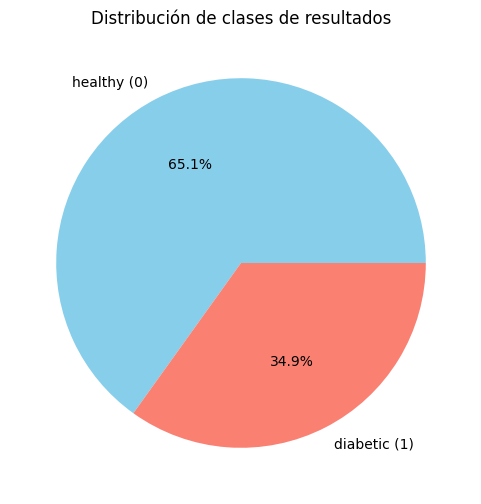

In [17]:
# Outcome Encontrar la distribución de valores de la columna (variable objetivo/variable dependiente/resultado)
outcome_counts = df["Outcome"].value_counts()
print(outcome_counts)

# Crear un gráfico circular
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=['healthy (0)', 'diabetic (1)'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribución de clases de resultados')
plt.show()

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
  <span style="font-weight: bold;">📊 Estado equilibrado del conjunto de datos</span><br>En nuestro conjunto de datos, "Outcome" (variable objetivo) en la columna; <br> "No (0)" = 65%,<br> "Sí (1)" = 35% Observamos que la tasa es . Esta distribución muestra que nuestro conjunto de datos no está equilibrado...<br><br>
    <span style="font-weight: bold;"> ⚠️ Cosas a tener en cuenta</span><br>
En conjuntos de datos desequilibrados, se debe tener cuidado al elegir las métricas de evaluación del modelo.
accuracy(verdad) Las métricas pueden ser engañosas. El modelo sólo incluye la clase mayoritaria(0) Puede lograr una alta tasa de precisión al predecir correctamente. Pero en este caso, la clase minoritaria (1) ignora por completo los fallos.<br><br>
    
✅Una evaluación más precisa debería centrarse en las métricas:<br>

Al trabajar con conjuntos de datos no balanceados, es un enfoque más preciso centrarse en la métrica de puntuación F1. Al medir el equilibrio entre precisión y recuperación, el puntaje F1 refleja con mayor precisión el desempeño del modelo tanto en la clase minoritaria como en la mayoritaria. Esto es especialmente crítico en situaciones donde los falsos negativos o los falsos positivos son costosos.
<br><br>
Además, ROC-AUC (Area Under Curve) La puntuación también es una métrica importante para evaluar el rendimiento general del modelo. El valor AUC mide la capacidad del modelo para distinguir entre clases. Dentro del alcance de este estudio, se compararán modelos en función de las puntuaciones AUC y se analizará en detalle cuál funciona mejor.
<br><br>
Los métodos de cálculo y la interpretación de las métricas relevantes se discutirán en detalle en las siguientes secciones..<br>

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
    <span style="font-weight: bold;">🟧 Método de equilibrio de conjuntos de datos:</span><br>
Alternativamente, es posible continuar el proceso de modelado equilibrando el conjunto de datos. Entre los métodos de balanceo de datos:<br>
  •  <span style="font-weight: bold;">Oversampling (Multiplicando la clase minoritaria):</span> Lograr el equilibrio aumentando el número de ejemplos de clases minoritarias.<br>
  •  <span style="font-weight: bold;">Undersampling (Reducir la clase mayoritaria):</span>Lograr el equilibrio eliminando aleatoriamente muestras de la clase mayoritaria. <br><br>
Con estos y otros métodos similares, podemos volver a entrenar el modelo equilibrando el conjunto de datos y observar su efecto en el rendimiento.

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;">Variables independientes</li>
  <br>
  Representa las entradas, llamadas variables independientes o características, que el modelo utiliza para realizar predicciones. Las variables independientes son variables que tienen un efecto sobre la variable dependiente o se utilizan en el proceso de estimación.
      <br><br>
 🟧 En nuestro conjunto de datos, hay un total de <strong>8 variable independiente</strong> y los tipos de estas variables son <strong>digital</strong> Se ha identificado como.
</ul>


In [18]:
# Comprueba los tipos de datos de cada columna del conjunto de datos
df.dtypes

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
    🟧 <strong>Asimetría en distribuciones de datos: asimetría positiva, simétrica y negativa</strong><br>
</p>

In [19]:
def plot_histograms(dataframe, numeric_columns):
    """
    Función que dibuja histogramas para variables numéricas.

    Parametreler:
    - dataframe (pd.DataFrame): Marco de datos.
    - numeric_columns (list): Lista de columnas numéricas.

    Función:
    - Dibuja histogramas para cada columna y limpia los gráficos faltantes.
    """
    # Calcula el número de columnas y filas (cada fila tendrá 3 gráficos)
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 2) // 3  # 3 determinar el número de filas que serán columnas

    # Crear subtramas
    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  # Enderece el eje para facilitar el bucle.

    # Dibujar histograma para columnas numéricas
    for i, col in enumerate(numeric_columns):
        dataframe[col].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)

    # Eliminar ejes innecesarios
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

    # Comprimir y mostrar el diseño
    plt.tight_layout()
    plt.show()


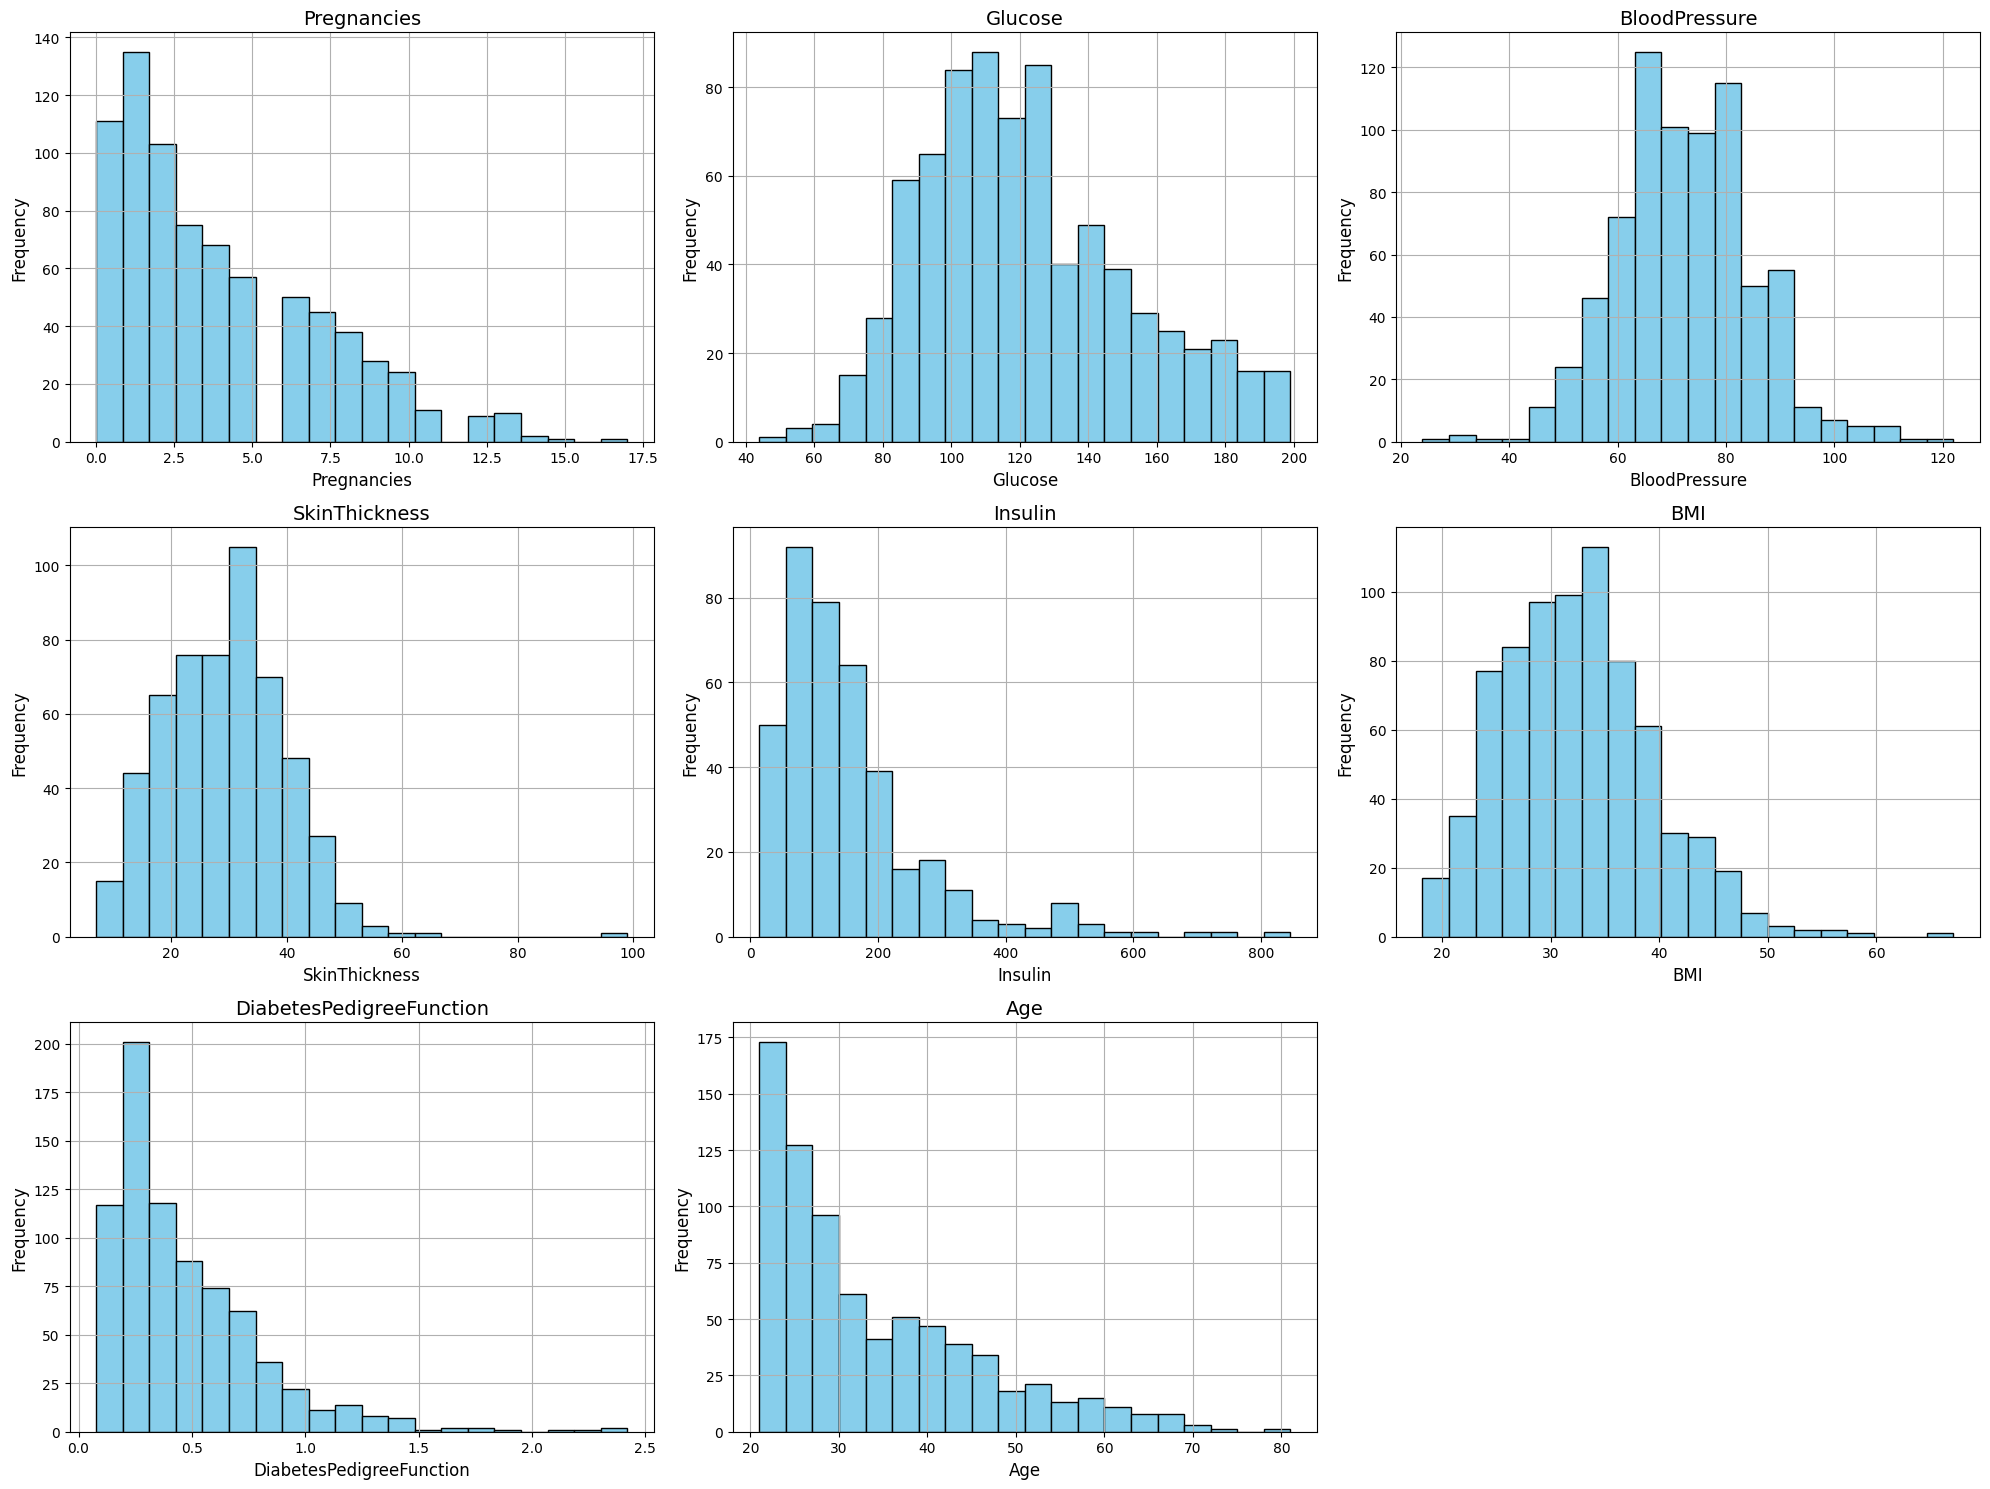

In [20]:
# Al dibujar un histograma para cada variable numérica, se visualiza dónde se concentran los datos y su distribución general.
plot_histograms(df, num_cols)

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Análisis de correlación</span> <a class="anchor" id="load_data"></a>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
       🟧 Una matriz de correlación es una tabla que mide la relación entre variables numéricas. Los coeficientes de correlación toman valores entre -1 y 1.:<br><br>
  •  <span style="font-weight: bold;">Correlación positiva:</span> A medida que una variable aumenta, la otra también aumenta (por ejemplo, los ingresos y los gastos)..<br>El coeficiente de correlación toma valores entre 0 y 1.<br>
Si el coeficiente está cerca de 0: hay una relación positiva débil.<br>
A medida que el coeficiente se acerca a 1: existe una fuerte relación positiva.<br><br>
  •  <span style="font-weight: bold;">Correlación negativa:</span> A medida que una variable aumenta, la otra disminuye (por ejemplo, la velocidad y el tiempo de viaje). <br>El coeficiente de correlación toma valores entre -1 y 0.<br>
Si el coeficiente está cerca de 0: hay una relación negativa débil.<br>
A medida que el coeficiente se acerca a -1: existe una fuerte relación negativa.<br><br>
⚠️ Esta relación sólo indica una conexión, no causalidad; Así que no podemos decir que una variable causa otra.<br><br>

</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
    🟧 <strong>Multicorrelación y su efecto en el modelo</strong><br><br>
    Entre las variables independientes <strong>alta correlación (80% y más)</strong> Es una situación indeseable..
    <strong>Multicorrelación</strong>, Dos o más variables independientes tienen una fuerte relación entre sí y pueden suponer riesgos significativos en el proceso de modelado.<br><br>
    🔹 <strong>Aumenta la complejidad del modelo:</strong> Las variables con alta correlación entre sí son
    <strong>hace que sea difícil determinar qué variable es más importante</strong> y dificulta la interpretación.<br><br>
    🔹 <strong>Esto conduce a una repetición innecesaria de información.:</strong>Las variables que llevan la misma información se incluyen en el modelo.
    <strong>Puede añadir complejidad innecesaria, reduciendo la capacidad de aprendizaje.</strong> y puede impedir que el modelo funcione de manera eficiente.<br><br>
    Por lo tanto, en los procesos de análisis <strong>Detección y gestión de la multicorrelación</strong> es un paso crítico<br><br>
    ⚠️ <strong>Sugerencias de solución:</strong><br>
    ✅ <strong>Identificación de variables con alta multicorrelación:</strong> Las variables con alta correlación se pueden analizar y eliminar del modelo o procesar de manera diferente.<br>
    ✅ <strong>Transformación y fusión de características:</strong> Se combinan variables que llevan información similar <strong>Se puede evitar la duplicación innecesaria de datos</strong>.<br>
    ✅ <strong>Análisis de componentes principales(PCA):</strong> Es posible minimizar la correlación y hacer que el modelo sea más robusto reduciendo el número de variables.<br><br>
    Con estos pasos <strong>Se puede aumentar el rendimiento y la fiabilidad del modelo</strong>, De esta forma se pueden obtener estimaciones más precisas.
</p>


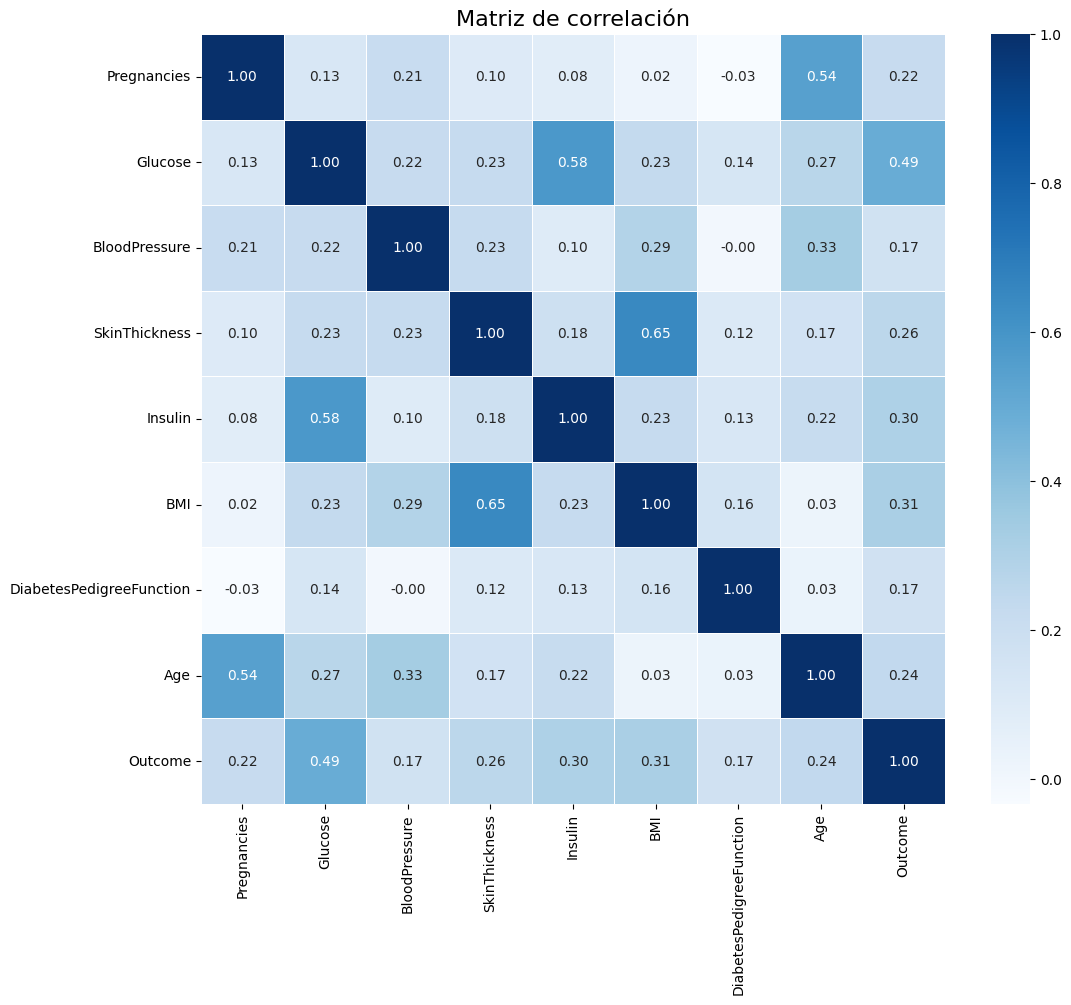

In [21]:
# Creación de una matriz de correlación
correlation_matrix = df.corr()

# Visualización de la matriz de correlación para todas las variables
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación", fontsize=16)
plt.show()

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
       ⬇️ Outcome Los valores de correlación entre la variable y otras variables se muestran como un mapa de calor..<br>
</p>

Outcome Correlaciones entre y otras variables:
Outcome                    1.00
Glucose                    0.49
BMI                        0.31
Insulin                    0.30
SkinThickness              0.26
Age                        0.24
Pregnancies                0.22
DiabetesPedigreeFunction   0.17
BloodPressure              0.17
Name: Outcome, dtype: float64


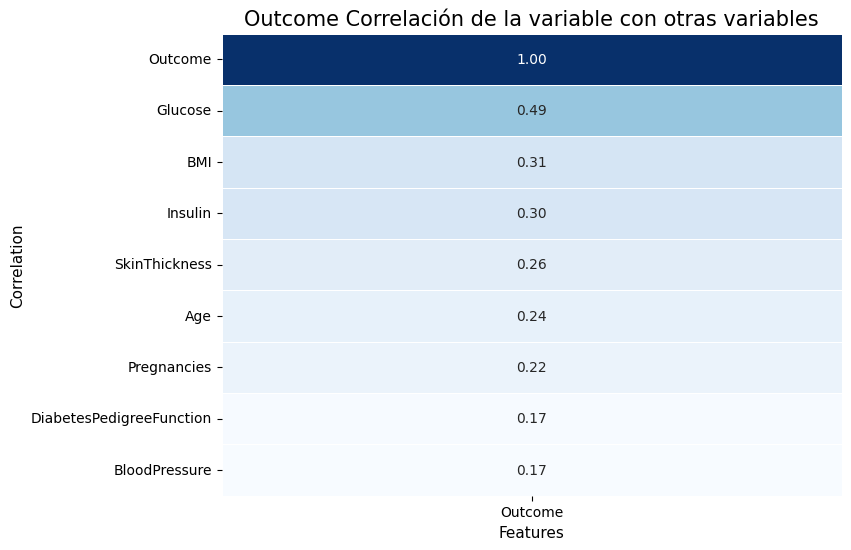

In [22]:
# Outcome Relación entre la variable dependiente y otras variables

# Outcome Seleccionar correlaciones por columna
outcome_correlation = correlation_matrix['Outcome'].sort_values(ascending=False)

# Imprimir tabla de correlación
print("Outcome Correlaciones entre y otras variables:")
print(outcome_correlation)

# Visualización: Mapa de calor de correlación (Outcome con otras variables)
plt.figure(figsize=(8, 6))
sns.heatmap(outcome_correlation.to_frame(), annot=True, cmap='Blues', fmt=".2f", cbar=False, linewidths=0.5)
plt.title('Outcome Correlación de la variable con otras variables', fontsize=15)
plt.xlabel('Features', fontsize=11)
plt.ylabel('Correlation', fontsize=11)
plt.show()


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
       🟧 Estos valores de correlación,, Outcome Nos ayuda a comprender la fuerza y ​​la dirección de las relaciones entre la variable y otras variables.:<br><br>
  •  Outcome glucosa (0.49) Existe una relación positiva entre.<br><br>
  •  Outcome Valores del IMC (0.31) y la insulina(0.30) Existe una relación positiva moderada entre. <br><br>
  •  Outcome Presión arterial alta (0.17) y DiabetesPedigreeFunction (0.17) La relación entre ellos es bastante débil. <br><br>

</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
        ⚠️ <span style="font-weight: bold;">NO:</span> La correlación es un concepto estadístico que mide la relación entre dos variables; pero la correlación es alta,  <span style="font-weight: bold;"> no significa necesariamente que una variable sea significativa en el modelo.</span> <br>Una variable independiente puede tener una alta correlación con la variable dependiente, pero su efecto en el modelo es (feature importance) Puede ser baja y viceversa.<br><br>
    Puede haber varias razones para esto.:<br><br>
  •  <span style="font-weight: bold;">Alta correlación+ Bajo Feature Importance:</span> Incluso si una variable tiene una alta correlación con la variable dependiente, no se ve afectada por las relaciones con otras variables independientes. (multicollinearity) Puede verse afectado. En este caso, el modelo puede considerar esta variable como menos importante..<br><br>
  • <span style="font-weight: bold;">Baja correlación + Alto Feature Importance:</span> Aunque una variable pueda parecer tener una baja correlación con la variable dependiente, puede tener un alto valor de importancia característica debido a sus interacciones con otras variables en el modelo. <br><br>
</p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Particionado de datos y métodos de validación de modelos: Hold-Out, Cross Validation y usar juntos (Hold-Out+Cross Validation) </span> <a class="anchor" id="load_data"></a>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">   
  <span style="font-weight: bold;">1️⃣El método Hold-Out : </span> El conjunto de datos se divide en conjuntos de entrenamiento y de prueba utilizando el método de retención. Este proceso se puede realizar separando el 80% del conjunto de datos como entrenamiento y el 20% como conjunto de prueba. Sin embargo, estas tasas pueden variar según el tamaño del conjunto de datos. Para conjuntos de datos más grandes, puede ser preferible una proporción del conjunto de prueba del 10 % o menos..<br><br>
 •  <span style="font-weight: bold;">Conjunto educativo del 80%:</span> Los datos utilizados para aprender el modelo. El modelo aprende las relaciones entre las clases a partir de estos datos y se entrena a sí mismo.
<br><br>
 •  <span style="font-weight: bold;">Conjunto de prueba del 20%:</span> Se utiliza para evaluar el rendimiento del modelo en datos que no ha visto antes. Este paso es fundamental para probar la generalización del modelo.
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">   
 <span style="font-weight: bold;">2️⃣El método Cross Validation (Validación cruzada) :</span>  La validación cruzada es un método para evaluar el rendimiento del modelo dividiendo el conjunto de datos en varias partes (por ejemplo, 5 o 10). Este proceso funciona de la siguiente manera:<br><br>
 •  <span style="font-weight: bold;"> División del conjunto de datos: </span> El conjunto de datos tiene un cierto número de “pliegues”(fold) dividido.
<br><br>
 •  <span style="font-weight: bold;">Entrenamiento y prueba de modelos: </span> En cada iteración, uno de los pliegues se utiliza como conjunto de prueba y los restantes se utilizan como conjunto de entrenamiento. El modelo aprende con estos datos de entrenamiento y se prueba en el piso de pruebas para obtener un valor de error.
Este proceso se repite una vez para cada pliegue del conjunto de prueba.
 <br><br>
 •  <span style="font-weight: bold;"> Cálculo del rendimiento: </span> Se promedian los errores de prueba obtenidos en cada iteración. Este promedio representa el éxito general del modelo.<br><br>

📌 Cross Validation (Validación cruzada), A menudo se prefiere, especialmente cuando el conjunto de datos es pequeño o cuando queremos medir mejor la capacidad de generalización del modelo. Además, este método ayuda a evitar el sobreajuste del modelo y proporciona resultados más confiables.
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">   
 <span style="font-weight: bold;">3️⃣El método Hold-Out + Cross Validation: </span>
Hold-Out El método y la validación cruzada se pueden utilizar juntos. Este proceso funciona de la siguiente manera:<br><br>
 •  Los datos se dividen primero en dos. Como conjunto de entrenamiento y conjunto de prueba.
<br><br>
 •  Se realiza una validación cruzada para medir la búsqueda o el rendimiento de hiperparámetros del modelo de manera más confiable dentro del conjunto de entrenamiento.
 <br><br>
 •  En el último paso, el mejor modelo encontrado se prueba en el conjunto de pruebas reservado (la parte que no se utiliza en absoluto al principio) y se mide el rendimiento de generalización real del modelo.<br><br>

📌 Este método es un enfoque eficaz para medir mejor la capacidad de generalización del modelo, especialmente en casos de conjuntos de datos medianos o grandes. Sin embargo, cuando el conjunto de datos es demasiado pequeño, los datos de prueba pueden ser insuficientes. En este caso, el método de validación cruzada pura puede proporcionar resultados más confiables.
</ul>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Train - Separación de prueba </span> <a class="anchor" id="load_data"></a>

In [23]:
# =====================================
# Separación de variables dependientes e independientes
# =====================================
target_name = 'Outcome'   # Nombre de la variable objetivo (dependiente)
y = df[target_name]        # Variable objetivo (y)
X = df.drop(target_name, axis=1)  # Restar variable dependiente => Variables independientes (X)

In [24]:
# ========================================
# Entrenamiento/Test (El método Hold-out)
# ========================================
# Conjunto de datos El 80% está reservado para Entrenamiento y el 20% para pruebas.
# 'stratify=y' => Para preservar la distribución de clase de la variable de destino.
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=35,
                                                    stratify=y
)

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
⚠️ En los pasos de preprocesamiento de datos, como completar valores faltantes, analizar valores atípicos, escalar y codificar, primero separamos los datos en entrenamiento y prueba. Realizamos estas operaciones solo en los datos de entrenamiento y aplicamos las estadísticas que obtuvimos del entrenamiento a los datos de prueba. Así, sin ver ninguna información estadística de los datos de prueba, <span style="font-weight: bold;"> fuga de datos(data leakage) </span>  Nosotros prevenimos.<br>
</p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Análisis y gestión de datos faltantes</span> <a class="anchor" id="load_data"></a>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
El análisis de datos faltantes es un proceso importante que no se puede ignorar en los proyectos de ciencia de datos; El manejo correcto de los datos faltantes juega un papel fundamental en la confiabilidad y precisión de los análisis realizados. Especialmente cuando se utilizan algoritmos basados ​​en la distancia, como K-Nearest Neighbors (K-NN), la gestión eficaz de los datos faltantes es de gran importancia para el rendimiento del modelo. Dado que estos algoritmos realizan estimaciones basadas en distancias entre puntos de datos, la falta de datos puede impedir cálculos de distancia precisos..<br><br>
📌Uno de los puntos más importantes a considerar cuando se trabaja con datos faltantes es determinar si los datos faltantes son aleatorios o estructurales. Porque los métodos a aplicar varían dependiendo de la estructura de los datos faltantes..<br><br>
<span style="font-weight: bold;">Tipos de datos faltantes</span><br><br>
• <span style="font-weight: bold;">Desaparecido completamente al azar (MCAR):</span>Las deficiencias ocurren independientemente de cualquier variable particular. En este caso suelen ser suficientes operaciones sencillas (por ejemplo borrar o rellenar)..<br><br>
 • <span style="font-weight: bold;">Datos estructurales faltantes (MAR/MNAR - Missing At Random / Missing Not at Random):</span>Las deficiencias están asociadas a variables específicas o existe una causa subyacente para la deficiencia. En este caso, los métodos de eliminación o de relleno simple pueden dar lugar a sesgos graves.<br><br>  

</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
🟧 Como primer paso, es necesario analizar si los datos faltantes son aleatorios o estructurales. Para esto podemos utilizar la biblioteca missingno.<br>

</p>

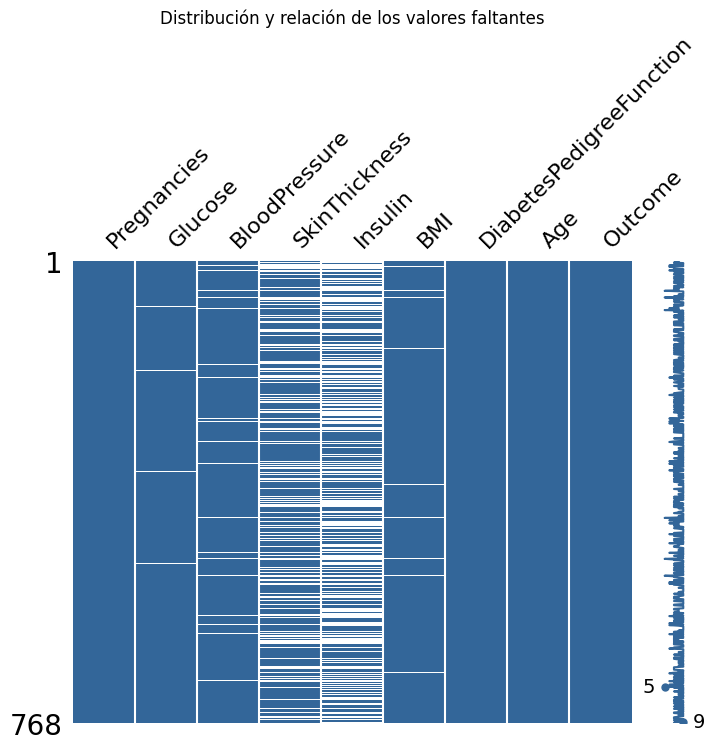

In [25]:
# Visualizar la relación de los datos faltantes,
msno.matrix(df, figsize=(8, 6), color=(0.2, 0.4, 0.6))
plt.title('Distribución y relación de los valores faltantes')
plt.show()

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
   Como se puede ver, los datos faltantes en nuestro conjunto de datos son aleatorios. (MCAR - Missing Completely at Random) consta de; Esto demuestra que las deficiencias ocurren independientemente de cualquier variable particular.<br> En este caso se pueden aplicar métodos simples (borrar, rellenar).

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
  🟧  Los métodos utilizados para tratar los datos faltantes generalmente se dividen en dos categorías principales: métodos de eliminación y métodos de relleno.<br><br>

 <span style="font-weight: bold;">1.) Métodos de eliminación (Deletion) </span><br><br>
 • <span style="font-weight: bold;">Eliminar toda la fila (Listwise Deletion):</span> Todas las observaciones con valores faltantes se eliminan del conjunto de datos. Sin embargo, este método puede provocar pérdida de información porque también se pierde información de otras variables. Puede ser preferible eliminar toda la fila si los datos faltantes son menores al 5 %, pero generalmente no se utiliza con frecuencia..<br><br>
 • <span style="font-weight: bold;">Eliminar variable:</span> Las variables con una tasa muy alta de datos faltantes se eliminan del conjunto de datos. Sin embargo, este método puede provocar la pérdida de variables importantes.
. Se puede considerar la eliminación de variables para variables con una tasa de datos faltantes de más del 50%. Por ejemplo, generalmente no es razonable mantener una variable con un 80% de datos faltantes en el conjunto de datos y su eliminación es una opción más apropiada.
 <br><br>

📌 <span style="font-weight: bold;">Sugerencia: </span>
En los casos donde haya una alta tasa de datos faltantes, es importante comunicarse con los departamentos o expertos pertinentes. Este enfoque nos ayuda a comprender por qué faltan datos y a elegir el método adecuado.<br>
<span style="font-weight: bold;">Preguntas de muestra:</span><br>
•¿Faltan datos debido a un error de medición?<br>
• ¿Esta variable es crítica para el análisis o se puede omitir?
Las respuestas a estas preguntas nos proporcionan pistas importantes sobre cómo manejar los datos faltantes en el conjunto de datos.
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;">2.) Métodos de llenado (Imputation) </span><br><br>
 <span style="font-weight: bold;">Para variables numéricas:</span><br><br>
 • <span style="font-weight: bold;">Relleno con Promedio:</span> Si la distribución de los datos es normal, los valores faltantes se pueden completar con el valor medio de la variable..<br><br>
 • <span style="font-weight: bold;">Relleno con mediana:</span> Si la distribución de los datos no es normal o hay muchos valores atípicos, es más apropiado rellenar con la mediana. Esto se debe a que la métrica mediana no se ve afectada por valores atípicos..<br><br>
<br>
<span style="font-weight: bold;">Para variables categóricas:</span><br><br>

 • <span style="font-weight: bold;">Rellenar con Mod:</span> Los valores faltantes son las ocurrencias más frecuentes de la variable (mod) se puede rellenar con el valor.<br><br>

⚠️
Completar datos faltantes es un proceso que requiere al menos tanto cuidado como borrarlos.
Nuestro objetivo principal al completar los datos faltantes es minimizar el margen de error y garantizar que se realicen inferencias correctas preservando al mismo tiempo la integridad del conjunto de datos. Un método de llenado incorrecto o defectuoso puede generar resultados de análisis engañosos y afectar negativamente el rendimiento del modelo.
<br><br>
🟧 Por lo tanto, a la hora de decidir cómo completar los datos faltantes, deberíamos plantearnos esta pregunta::
<span style="font-weight: bold;">"¿Cómo puedo completar los datos faltantes con un mínimo error?</span> 🧐<br><br>

• Los datos faltantes se pueden completar utilizando variables independientes que tengan una alta correlación con la variable objetivo..<br><br>
<span style="font-weight: bold;">Entonces ¿por qué no completamos directamente la variable dependiente?</span> 🧐<br>

El relleno basado en variables dependientes es un enfoque arriesgado.
El relleno basado en la variable dependiente puede interrumpir el proceso de aprendizaje del modelo y crear relaciones espurias. Esto cambia la distribución del conjunto de datos, reduciendo la confiabilidad de los resultados del análisis. Por lo tanto, no es preferible.<br><br>

• Puede rellenarse con un criterio de agrupación adecuado al contexto.<br> Ejemplo: La información salarial faltante en un conjunto de datos de empleados se puede completar con los salarios promedio por departamento.<br><br>

•Las variables categóricas se pueden agrupar sobre otras variables para completar los valores faltantes..<br>
Ejemplo: El valor más frecuente para cada grupo, teniendo en cuenta variables como edad y género. (mod) Los valores categóricos faltantes se pueden completar con . Este método proporciona resultados más precisos que son consistentes con la distribución general..<br><br>


In [26]:
def missing_values_table(dataframe, na_name=False):
    """
    Muestra el número y la proporción de valores faltantes en el conjunto de datos como una tabla..

    Parameters:
        dataframe (pd.DataFrame): Marco de datos
        return_columns (bool): Para devolver los nombres de las columnas con valores faltantes

    Returns:
        list: Nombres de columnas con valores faltantes(return_columns=True ise)
    """
    # Buscar columnas con valores faltantes
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    # Calcular el número de valores faltantes y sus proporciones
    n_miss = dataframe[na_columns].isnull().sum()
    ratio = (n_miss / len(dataframe) * 100)

    # Crear una tabla de valores faltantes
    missing_df = pd.DataFrame({'n_miss': n_miss, 'ratio': ratio.round(2)}).sort_values(by='n_miss', ascending=False)

    # Tabla de impresión
    print(missing_df, end="\n\n")
    print("Columnas con valores faltantes:", na_columns)

    # Devolver columnas faltantes (opcional)
    if na_name:
        return na_columns

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
   🟧 Podemos ver si una variable se distribuye normalmente con un gráfico de histograma.
</ul>

In [27]:
def plot_missing_columns_histograms(dataframe, na_columns, columns_per_row=3):
    """
    Dibuja histogramas de columnas con valores faltantes.

    Parameters:
        dataframe (pd.DataFrame): Marco de datos
        na_columns (list): Nombres de columnas con valores faltantes
        columns_per_row (int): ¿Cuántos gráficos mostrar en cada fila?(default: 3)
    """
    num_columns = len(na_columns)  # Número de columnas faltantes
    rows = math.ceil(num_columns / columns_per_row)  # Número total de filas

    # Crea la figura y los ejes
    fig, axes = plt.subplots(rows, columns_per_row, figsize=(columns_per_row * 6, rows * 4))
    axes = axes.ravel()  # Convertir ejes 2D a 1D

    for i, col in enumerate(na_columns):
        dataframe[col].dropna().hist(ax=axes[i], bins=30, color='blue', alpha=0.7)
        axes[i].set_title(f"Histogram of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].grid(True)

    # Eliminar ejes no utilizados
    for ax in axes[i + 1:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

               n_miss  ratio
Insulin           307  50.00
SkinThickness     188  30.62
BloodPressure      28   4.56
BMI                 9   1.47
Glucose             4   0.65

Columnas con valores faltantes: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


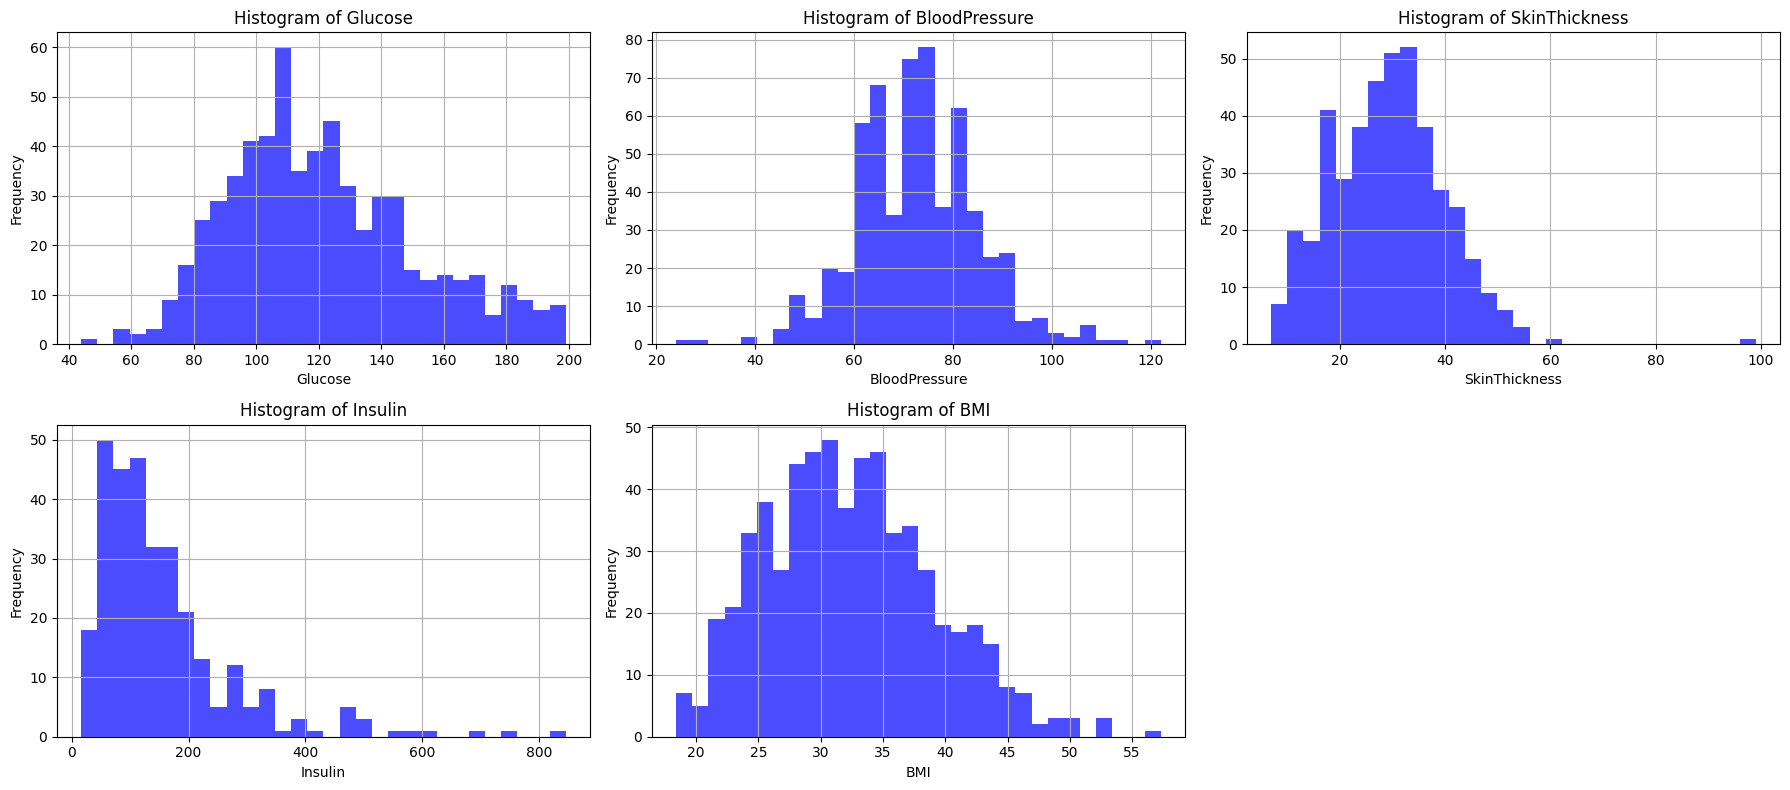

In [28]:
# Examinar los valores faltantes en el conjunto de entrenamiento
na_columns_train = missing_values_table(X_train, na_name=True)  # Obtener columnas faltantes
plot_missing_columns_histograms(X_train, na_columns_train)   # Dibujar histograma para las columnas faltantes

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
   La tasa de datos faltantes en la variable insulina se calculó como 50%. Esta es una tasa alta. Por lo tanto, antes de rellenar el formulario, sería más adecuado ponerse en contacto con los departamentos o expertos pertinentes y obtener información sobre la fuente de los datos que faltan.
</ul>

In [29]:
def fill_missing_values(X_train, X_test, fill_methods):
    """
    Rellena los valores faltantes con estadísticas del conjunto de entrenamiento y los aplica al conjunto de prueba.

    Parameters:
        X_train (pd.DataFrame): Conjunto de datos de entrenamiento
        X_test (pd.DataFrame): Conjunto de datos de prueba
        fill_methods (dict): Columnas y métodos de llenado

    Returns:
        X_train_filled, X_test_filled: Conjuntos de datos con valores faltantes rellenados
    """
    X_train_filled = X_train.copy()
    X_test_filled = X_test.copy()

    for col, method in fill_methods.items():
        if method == 'mean':
            fill_value = X_train[col].mean()
        elif method == 'median':
            fill_value = X_train[col].median()
        else:
            raise ValueError("Método de llenado no válido.")

        # Complete el conjunto de entrenamiento y prueba (¡usando las estadísticas de entrenamiento!)
        X_train_filled[col] = X_train[col].fillna(fill_value)
        X_test_filled[col] = X_test[col].fillna(fill_value)

        print(f"{col} columna '{method}' Se llenó con el método. Valor: {fill_value:.2f}")

    return X_train_filled, X_test_filled

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
   ⬇️Los valores NaN en las columnas faltantes se completaron de acuerdo con las distribuciones de las variables.
</ul>

In [30]:
fill_methods = {
    'Glucose': 'mean',
    'BloodPressure': 'mean',
    'SkinThickness': 'median',
    'Insulin': 'median',
    'BMI': 'median'
}

X_train, X_test = fill_missing_values(X_train, X_test, fill_methods)

Glucose columna 'mean' Se llenó con el método. Valor: 121.19
BloodPressure columna 'mean' Se llenó con el método. Valor: 72.65
SkinThickness columna 'median' Se llenó con el método. Valor: 30.00
Insulin columna 'median' Se llenó con el método. Valor: 125.00
BMI columna 'median' Se llenó con el método. Valor: 32.00


In [31]:
# Comprobando cambios
print(X_train.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [32]:
print(X_test.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Análisis y gestión de valores atípicos </span> <a class="anchor" id="load_data"></a>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
Los valores atípicos son valores que se desvían significativamente de la tendencia general de los datos. Estos valores pueden afectar directamente el análisis de datos y el rendimiento del modelo. En particular, los algoritmos basados ​​en la distancia (por ejemplo, K-Vecinos Más Cercanos - K-NN) y los modelos lineales se ven más afectados por los valores atípicos. Sin embargo, los modelos basados ​​en árboles (como Random Forest, XGBoost) son más robustos ante valores atípicos y generalmente se ven menos afectados por dichos problemas..<br><br>
📌 Los valores atípicos son univariados dependiendo de la distribución de observaciones en el conjunto de datos. (univariate) o multivariante (multivariate)puede detectarse mediante métodos.<br><br>
• <span style="font-weight: bold;">Para el análisis univariado</span> Se pueden utilizar métodos como información sectorial, método de desviación estándar, puntuación Z y método RIQ.<br><br>
 • <span style="font-weight: bold;">Para análisis multivariado</span> Local Outlier Factor (LOF) Se puede utilizar el método. Local Outlier Factor (LOF) El método se utiliza para detectar situaciones en las que algunos valores que no parecen ser valores atípicos en términos de una sola variable se convierten en valores atípicos cuando se evalúa más de una variable en conjunto.

</p>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;">IQR Análisis de valores atípicos con método:</span><br> <br>
 <span style="font-weight: bold;">1️⃣ Cálculo de cuartiles o percentiles:</span><br><br>
 • <span style="font-weight: bold;">Q1 (1. Cuarto):</span> El valor correspondiente al 25% de los datos (cuartil inferior).<br>
 • <span style="font-weight: bold;">Q3 (3. Cuarto):</span> El valor correspondiente al percentil 75 de los datos (cuartil superior).<br>
 • <span style="font-weight: bold;">IQR (Distancia intercuartil):</span> Q3 - Q1<br><br>
   🟧  Método alternativo: para un análisis más flexible, se pueden utilizar percentiles del 1% y del 99% o del 5% y del 95%. Se prefieren estos percentiles para minimizar el impacto de valores más extremos en los datos.<br>
___________________________________________________________________________________________________________________________________________________

<br>

  <span style="font-weight: bold;">2️⃣ Determinación de límites de valores atípicos:</span><br><br>
 • <span style="font-weight: bold;">Límite inferior:</span> Q1 - (1.5 × IQR)<br>
 • <span style="font-weight: bold;">Límite superior:</span> Q3 + (1.5 × IQR)<br><br>
   🟧  Determinación de límites basados ​​en percentiles (método alternativo):<br>
   •Límite inferior: Valor correspondiente a una porción del 1% o 5%.<br>
   • Límite superior: El valor correspondiente al rango del 99% o 95%..<br>
   
___________________________________________________________________________________________________________________________________________________

<br>

  <span style="font-weight: bold;">3️⃣Detección y procesamiento de valores atípicos:</span><br><br>
 Los valores por debajo del límite inferior o por encima del límite superior se consideran valores atípicos. Estos valores se pueden procesar de diferentes maneras.:<br><br>
 • <span style="font-weight: bold;">Eliminar (Removing):</span> Los valores atípicos se pueden eliminar del conjunto de datos. Sin embargo, este método debe utilizarse con precaución ya que puede provocar pérdida de información.<br><br>
 • <span style="font-weight: bold;">Supresión (Capping):</span> Los valores atípicos se reemplazan con valores límite. Este método evita la pérdida de información y reduce el impacto de los valores extremos en el conjunto de datos.<br>
Valores por debajo del límite inferior: reemplazado por el límite inferior.<br>
Valores por encima del límite superior: se reemplaza con el límite superior.<br><br>
 • <span style="font-weight: bold;">Marcar como datos faltantes: </span> Los valores atípicos pueden marcarse como datos faltantes (NaN). En este caso se pueden aplicar métodos de gestión de datos faltantes.:<br>
Con la mediana se pueden rellenar los valores faltantes sin distorsionar la distribución de los datos..<br>
Con la estimación de regresión, podemos estimar los valores faltantes en función de su relación con otras variables.
.<br>

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
   El conocimiento de la industria o la experiencia en el dominio desempeñan un papel fundamental a la hora de contextualizar los datos y determinar qué valores son realmente atípicos.<br><br>
📌 En este estudio, el análisis de valores atípicos se realizará en dos etapas.:<br><br>
  <span style="font-weight: bold;">1️⃣ Evaluación médica:</span>   <br>
En la primera etapa, los datos se evalúan teniendo en cuenta los límites médicamente aceptables. El objetivo es procesar valores atípicos de manera significativa a la luz del conocimiento de la industria.:<br><br>
 • <span style="font-weight: bold;">Valores por debajo del límite inferior:</span>  Si un valor está por debajo del límite médico aceptable más bajo, dicho valor se reemplaza por el valor límite inferior correspondiente..<br>
 • <span style="font-weight: bold;">Valores por encima del límite superior:</span> Si un valor está por encima del límite más alto médicamente aceptable, este valor se reemplaza por el valor límite superior correspondiente..<br><br>


  <span style="font-weight: bold;">2️⃣ Evaluación estadística (método RIQ):</span>   <br>
Una vez finalizada la evaluación médica, se realiza un análisis estadístico más detallado. En este paso, se detectan valores atípicos utilizando el método de rango intercuartil (RIC). Cálculo del RIQ:<br><br>
 • <span style="font-weight: bold;">Q1:</span> rebanada del 5% (0.05)<br>
  • <span style="font-weight: bold;">Q3:</span> rebanada del 95%(0.95)<br>
• <span style="font-weight: bold;">IQR:</span> Q3 - Q1 (0.95)<br>
Límite inferior: Q1 - 1.5 × IQR <br>
Límite superior: Q3 + 1.5 × IQR<br>

La aplicación de este método permite identificar valores estadísticos atípicos que se encuentran fuera de los valores médicamente aceptables. De esta forma se minimiza el impacto de los valores extremos en el análisis de datos..<br><br>

📌 Este enfoque de dos etapas proporciona un conjunto de datos más confiable y resultados de análisis más precisos. La aplicación conjunta de ambos métodos proporciona un proceso de limpieza de datos que se basa tanto en hechos médicos como en solidez estadística.

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;">1. Etapa: Evaluación médica</li>
</ul>

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,763.00,121.69,30.54,44.00,99.00,117.00,141.00,199.00
BloodPressure,733.00,72.41,12.38,24.00,64.00,72.00,80.00,122.00
SkinThickness,541.00,29.15,10.48,7.00,22.00,29.00,36.00,99.00
Insulin,394.00,155.55,118.78,14.00,76.25,125.00,190.00,846.00
BMI,757.00,32.46,6.92,18.20,27.50,32.30,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;"> 1️⃣ Embarazos (Número de embarazos):</span><br> El número máximo de embarazos observado fue 17.
Aunque un embarazo de 17 veces es poco común, es médicamente posible. Por lo tanto, no se puede decir que exista un valor atípico en esta variable.
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;"> 2️⃣️ Glucose (Nivel de glucosa):</span><br> El valor mínimo observado fue 44 y el valor máximo 199.
Médicamente, es posible que los niveles de glucosa estén en estos rangos. Por tanto, no hay ninguna contradicción.  
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;"> 3️⃣ Presión arterial:</span><br> El valor mínimo observado fue 24 y el valor máximo 122.<br>
 • <span style="font-weight: bold;">Valor máximo 122 presión arterial</span>  médicamente aceptable.<br>
  • <span style="font-weight: bold;"> Sin embargo, el valor mínimo es 24 de presión arterial.</span>no es posible y se considera como un error de medición o una situación anormal. Por lo tanto, se debe realizar un análisis de valores atípicos para la variable Presión Arterial y los valores mínimos deben manejarse con métodos apropiados..<br><br>
  📌El valor más bajo médicamente aceptable para la presión arterial suele ser 50 mmHg. Las mediciones por debajo de este valor generalmente se consideran inexactas o anormales. En este estudio, se reducirá el efecto de los valores atípicos corrigiendo los valores inferiores a 50 mmHg..<br><br>  
    ⚠️ <span style="font-weight: bold;">Sugerencia:</span><br>
También debe tenerse en cuenta la tasa de valores atípicos antes de continuar con el proceso de supresión. Si la proporción de valores atípicos es demasiado alta, suprimir estos valores puede crear ruido en el conjunto de datos y reducir la importancia de los datos. En tales casos, debe garantizarse la exactitud de las medidas que se van a adoptar mediante la comunicación con los departamentos o expertos pertinentes. Este enfoque armonizará el conjunto de datos con las realidades médicas y aumentará la fiabilidad del análisis.
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;"> 4️⃣ Grosor de la piel:</span><br> <br>
  • <span style="font-weight: bold;"> El valor mínimo es 7, el valor máximo es 99</span> Se ha observado como. Estos valores no son médicamente posibles y se consideran un error de medición o una situación anormal..<br><br>
  📌 El valor más bajo médicamente aceptable para el espesor de la piel es generalmente 10 mm, y el valor más alto es alrededor de 50 mm. Los valores fuera de este rango se consideran errores de medición o condiciones anormales. En este estudio, el efecto de los valores atípicos se reducirá corrigiendo los valores inferiores a 10 mm y los valores superiores a 50 mm       
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;"> 5️⃣️ Insulina (Insulina):</span><br> El valor mínimo observado fue 14 y el valor máximo fue 846.<br>
 • <span style="font-weight: bold;">Valor mínimo 14 insulina</span>  médicamente aceptable.<br>
  • <span style="font-weight: bold;"> Sin embargo, el valor máximo es 846 insulina.</span> No es médicamente posible y se considera un error de medición o una situación anormal.. <br><br>
  📌 Generalmente se considera que los niveles de insulina son máximos en el rango de 400 a 600 μU/mL. Las mediciones que superan este límite generalmente se consideran inexactas o anormales. En este estudio, se reducirá el efecto de los valores atípicos en el conjunto de datos corrigiendo los valores superiores a 600 μU/mL a 600 μU/mL.<br><br>  

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;"> 6️⃣ IMC (Índice de Masa Corporal):</span><br> En la variable IMC el valor máximo observado fue 67 (Obesidad) y el valor mínimo fue 18 (Bajo peso). Estos valores están dentro del rango médicamente aceptable. Por lo tanto, no se puede decir que exista un valor atípico en la variable IMC.
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;"> 7️⃣ DiabetesPedigreeFunction (Función de los antecedentes familiares de diabetes):</span><br> En la variable DiabetesPedigreeFunction, el valor mínimo observado fue 0,08 y el valor máximo fue 2,42. Estos valores están dentro del rango médicamente aceptable.<br>
   
•Esta variable es un coeficiente para medir la predisposición genética de los individuos a la diabetes y generalmente puede evaluarse entre 0 y 2,5. Por lo tanto, no se puede decir que exista un valor atípico en esta variable.
</ul>

In [34]:
# Función de supresión de valores atípicos (aspecto médico)
def clip_values(dataframe, col, min_val=None, max_val=None):
    # Crear una copia para dejar el conjunto de datos original sin cambios
    df_copy = dataframe.copy()

    # Si se especifica el límite inferior, suprima los valores por debajo del límite inferior en la columna hasta este valor límite.
    if min_val is not None:
        df_copy[col] = df_copy[col].apply(lambda x: max(x, min_val))

    # Si se especifica el límite superior, suprima los valores por encima del límite superior en la columna hasta este valor límite.
    if max_val is not None:
        df_copy[col] = df_copy[col].apply(lambda x: min(x, max_val))

    # Devolver un conjunto de datos actualizado con la columna suprimida
    return df_copy

In [35]:
# Analiza las tasas de valores atípicos en el conjunto de entrenamiento y realiza la supresión cuando es necesario.
def analyze_and_clip_train(dataframe, col, min_val=None, max_val=None, threshold_ratio=10):
    # Obtener el número total de observaciones
    total = dataframe.shape[0]

    # Realizar una comprobación del límite inferior si está disponible
    if min_val is not None:
        # Calcular el número de valores por debajo del límite inferior
        count_below = dataframe[dataframe[col] < min_val].shape[0]
        # Calcula la relación de estos valores como porcentaje
        ratio_below = (count_below / total) * 100
        print(f"{col}: {min_val} La relación de valores a continuación: %{ratio_below:.2f}")

        # Dar advertencia si la tasa es mayor que el valor umbral especificado
        if ratio_below > threshold_ratio:
            print(f"❗ {col} La tasa de valores por debajo del límite inferior en la variable es alta. Debería examinarse.")
        else:
            # Si está en un nivel aceptable, realice el proceso de supresión.
            dataframe = clip_values(dataframe, col, min_val=min_val)
            print(f"✅ {col} Los valores más bajos para fueron suprimidos.")

    # Realizar una comprobación del límite superior si la hay
    if max_val is not None:
        # Calcular el número de valores por encima del límite superior
        count_above = dataframe[dataframe[col] > max_val].shape[0]
        # Calcula la relación de estos valores como porcentaje
        ratio_above = (count_above / total) * 100
        print(f"{col}: {max_val} La relación de los valores anteriores: %{ratio_above:.2f}")

        # Dar advertencia si la tasa es mayor que el valor umbral especificado
        if ratio_above > threshold_ratio:
            print(f"❗ {col} La tasa de valores por encima del límite superior en la variable es alta. Debería examinarse.")
        else:
            # Si está en un nivel aceptable, realice el proceso de supresión.
            dataframe = clip_values(dataframe, col, max_val=max_val)
            print(f"✅ {col} Se suprimieron los valores superiores para .")

    # Devuelve el conjunto de datos que se ha suprimido o que necesita ser examinado
    return dataframe

In [36]:
# Analizar y suprimir valores inferiores a 50 en la variable BloodPressure en el conjunto de entrenamiento
X_train = analyze_and_clip_train(X_train, 'BloodPressure', min_val=50)

# Analizar y suprimir valores inferiores a 10 y superiores a 50 en la variable SkinThickness en el conjunto de entrenamiento
X_train = analyze_and_clip_train(X_train, 'SkinThickness', min_val=10, max_val=50)

# Analizar y suprimir valores superiores a 600 en la variable Insulina en el conjunto de entrenamiento
X_train = analyze_and_clip_train(X_train, 'Insulin', max_val=600)

BloodPressure: 50 La relación de valores a continuación: %2.12
✅ BloodPressure Los valores más bajos para fueron suprimidos.
SkinThickness: 10 La relación de valores a continuación: %0.65
✅ SkinThickness Los valores más bajos para fueron suprimidos.
SkinThickness: 50 La relación de los valores anteriores: %1.30
✅ SkinThickness Se suprimieron los valores superiores para .
Insulin: 600 La relación de los valores anteriores: %0.49
✅ Insulin Se suprimieron los valores superiores para .


In [37]:
# Suprimir los valores de 'Presión arterial' en el conjunto de prueba utilizando los límites establecidos en el conjunto de entrenamiento
X_test = clip_values(X_test, 'BloodPressure', min_val=50)

# Suprimir los valores de 'SkinThickness' en el conjunto de prueba utilizando los límites establecidos en el conjunto de entrenamiento (límite inferior de 10, límite superior de 50)
X_test = clip_values(X_test, 'SkinThickness', min_val=10, max_val=50)

#Suprimir los valores de 'Insulina' en el conjunto de prueba utilizando los límites establecidos en el conjunto de entrenamiento (límite superior 600)
X_test = clip_values(X_test, 'Insulin', max_val=600)

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;">2. Etapa: Evaluación estadística (Método RIQ)</li>
</ul>

In [38]:
# ================================
# Cálculo del límite de valores atípicos
# ================================
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    """
    Calcula límites de valores atípicos para una variable específica.
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    lower_limit = quartile1 - 1.5 * iqr
    upper_limit = quartile3 + 1.5 * iqr
    return lower_limit, upper_limit


# ================================
# Incluir las observaciones disidentes
# ================================
def grab_outliers(dataframe, col_name, lower, upper):
    """
    Devuelve valores atípicos en la columna especificada según los límites inferior/superior dados.
    """
    return dataframe[(dataframe[col_name] < lower) | (dataframe[col_name] > upper)]


# ================================
# Imprimir resumen de valores atípicos
# ================================
def print_outlier_summary(dataframe, dataset_name, outlier_limits, show_details=False):
    """
    Imprime un resumen de valores atípicos para cada columna del conjunto de datos especificado.
    """
    print(f"\n{'='*40}")
    print(f"🔎 {dataset_name.upper()} RESUMEN DE VALORES ATÍPICOS")
    print(f"{'='*40}")

    for col in dataframe.columns:
        lower, upper = outlier_limits[col]
        outliers = grab_outliers(dataframe, col, lower, upper)

        print(f"\n📌 {col}:")
        print(f"  Límite inferior : {lower:.2f}")
        print(f"  Límite superior : {upper:.2f}")
        print(f"  Número de valores atípicos: {outliers.shape[0]}")

        if show_details and not outliers.empty:
            print(outliers)


# ================================
# Detectar valores atípicos en el conjunto de entrenamiento
# ================================
outlier_limits = {}  # Para cada columna (límite inferior, límite superior)

for col in X_train.columns:
    lower, upper = outlier_thresholds(X_train, col)
    outlier_limits[col] = (lower, upper)

In [39]:
# ================================
# Imprimir resumen de valores atípicos para el conjunto de entrenamiento y prueba
# ================================
print_outlier_summary(X_train, "train", outlier_limits)
print_outlier_summary(X_test, "Test", outlier_limits)


🔎 TRAIN RESUMEN DE VALORES ATÍPICOS

📌 Pregnancies:
  Límite inferior : -15.00
  Límite superior : 25.00
  Número de valores atípicos: 0

📌 Glucose:
  Límite inferior : -71.50
  Límite superior : 332.50
  Número de valores atípicos: 0

📌 BloodPressure:
  Límite inferior : -3.00
  Límite superior : 149.00
  Número de valores atípicos: 0

📌 SkinThickness:
  Límite inferior : -29.37
  Límite superior : 88.03
  Número de valores atípicos: 0

📌 Insulin:
  Límite inferior : -319.05
  Límite superior : 664.15
  Número de valores atípicos: 0

📌 BMI:
  Límite inferior : -9.95
  Límite superior : 75.95
  Número de valores atípicos: 0

📌 DiabetesPedigreeFunction:
  Límite inferior : -1.32
  Límite superior : 2.57
  Número de valores atípicos: 0

📌 Age:
  Límite inferior : -34.50
  Límite superior : 113.50
  Número de valores atípicos: 0

🔎 TEST RESUMEN DE VALORES ATÍPICOS

📌 Pregnancies:
  Límite inferior : -15.00
  Límite superior : 25.00
  Número de valores atípicos: 0

📌 Glucose:
  Límite inf

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Ingeniería de características </span> <a class="anchor" id="load_data"></a>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
       🟧 La ingeniería de características es un proceso que tiene como objetivo mejorar el rendimiento del modelo derivando características nuevas y significativas de las variables existentes en el conjunto de datos. La creación de combinaciones o derivadas de variables que tengan fuertes relaciones con la variable objetivo aumenta la precisión y la capacidad de generalización del modelo. Sin embargo, lo importante en este proceso no es derivar tantas variables como sea posible, sino derivar características que sean significativas y contribuyan al modelo.
<br><br>
El método de importancia de las características se puede utilizar para medir el efecto de las variables derivadas en el modelo. Como resultado de este análisis, sólo se deben seleccionar las características que aumenten la precisión y la capacidad de generalización del modelo. Se deben evitar las variables redundantes y solo se deben seleccionar las características que hagan una contribución significativa.<br><br>
El proceso de generación de variables puede variar según la estructura del conjunto de datos, los objetivos del análisis y las necesidades del modelo.. <br> En este contexto, es necesario mencionar algunos métodos de derivación que se pueden aplicar.:<br><br>          
  •  <span style="font-weight: bold;">Derivación basada en análisis de correlación:</span> Al analizar las relaciones entre la variable objetivo y las variables existentes, se pueden derivar nuevas características significativas a través de conexiones directas o indirectas.
<br>
Relación directa: se seleccionan variables que tienen una alta correlación con la variable objetivo y se derivan de ellas..<br>
Ejemplo: si el IMC y la glucosa están altamente correlacionados con la variable objetivo, se pueden crear nuevas características como el producto (IMC × glucosa) o la relación (IMC/glucosa) de estas variables..<br>
Relación indirecta: Se pueden crear nuevos derivados combinando otras variables que pueden estar relacionadas indirectamente con la variable objetivo con variables que tienen alta correlación..<br>
ÖEjemplo: la glucosa y la edad pueden tener una relación indirecta con el objetivo. Se puede producir una nueva variable combinando estas dos variables (Glucosa×Edad).
<br><br>
  •  <span style="font-weight: bold;">Empoderamiento con importancia de las características:</span> Puede producir nuevas características que fortalecerán las variables que son importantes en el modelo..<br><br>
    •  <span style="font-weight: bold;">Clasificaciones significativas con información del dominio:</span>
La experiencia en el dominio puede mejorar tanto el rendimiento como la comprensibilidad del modelo al clasificar las variables en categorías significativas. Los enfoques de clasificación que se utilizan con frecuencia en el sector de la salud implican agrupar las variables según ciertos valores umbral. <br> Ejemplos:<br>
IMC (Índice de Masa Corporal):<br>
En el sector de la salud, el IMC se utiliza ampliamente para evaluar el estado de peso de las personas y se divide en ciertas categorías.:<br>
Bajo peso: IMC < 18.5<br>
Normal: 18,5 ≤ IMC < 25<br>
Sobrepeso: 25 ≤ IMC < 30<br>
Obeso: IMC ≥ 30<br><br>
Glucosa (nivel de azúcar en sangre):<br>
Los niveles de glucosa se pueden clasificar para evaluar el riesgo de diabetes de las personas.:<br>
Normal: glucosa < 100 mg/dL<br>
Prediabetes: 100 ≤ Glucosa < 126 mg/dL<br>
Diabetes: Glucosa ≥ 126 mg/dL <br><br>
•  <span style="font-weight: bold;">Categorización (clasificación):</span> Se pueden derivar nuevas variables dividiendo las variables continuas en ciertos intervalos y haciéndolas categóricas..<br>
Ejemplos:<br>
IMC (Índice de Masa Corporal):<br>
Los valores del IMC se pueden dividir en clasificaciones comúnmente utilizadas en el sector salud.:<br>
"Bajo peso (IMC < 18,5)<br>
""Normal" (18,5 ≤ IMC < 25) <br>
""Sobrepeso" (25 ≤ IMC < 30) <br>
"Obeso (IMC ≥ 30)<br><br>
Edad: <br>
Puedes analizar los valores de edad de forma más significativa dividiéndolos en grupos.:<br>
"Juventud" (18 ≤ Edad < 35)<br>
"Medio" (35 ≤ Edad < 60)<br>
"Anciano" (Edad ≥ 60)<br><br>
⚠️ <span style="font-weight: bold;">Antes de incluir las variables que derivamos en el modelo, es un paso importante evaluar si estas variables tienen una relación estadísticamente significativa con la variable objetivo. Esta evaluación puede realizarse con pruebas de significancia estadística (por ejemplo, prueba z) para determinar la aceptabilidad de las variables derivadas. Sin embargo, aquí no se debe olvidar un punto importante: la significación estadística de una variable derivada no garantiza necesariamente que sea una variable importante para el modelo. Esto se debe a que aún no hemos evaluado el impacto de la variable en el entorno multivariado, es decir, en el modelo.
    <br><br>    
Para comprender la importancia de la variable para el modelo, es necesario aplicar métodos como la importancia de las características en el proceso de modelado. Mientras que los análisis estadísticos miden el nivel de relación entre la variable derivada y la variable objetivo; Sólo podemos observar su contribución dentro del modelo y su impacto en el rendimiento durante los procesos de modelado. Estos dos pasos juntos nos ayudan a evaluar si las variables derivadas son significativas y útiles para el modelo..<br><br>
</p>

<a class="anchor" id="read"></a>
## <span style="color:#FA8072">  Conversión de variables categóricas a representación numérica (métodos de codificación) </span> <a class="anchor" id="load_data"></a>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
    Algoritmos de aprendizaje automático <strong>porque trabaja con datos numéricos</strong>, variables categóricas apropiadamente <strong>a representaciones numéricas</strong> Necesita ser convertido.
Esta transformación se proporciona mediante métodos de codificación y el método utilizado es el <strong>nominal (desordenado) u ordinal (ordenado)</strong> Varía según esté presente o no. Echemos un vistazo breve a los métodos de codificación..<br
</ul>


<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
  <strong>1️⃣ One-Hot Encoding (OHE):</strong><br>
    - One-Hot Encoding, Se crea una columna separada (variable ficticia) para cada categoría de variables categóricas no ordenadas (nominales).<br>
    - A la columna que contiene la clase relevante se le asigna 1 y a las demás columnas se les asigna 0.<br>
    - Se elimina la primera de las columnas resultantes del proceso de codificación one-hot.Esto se debe a que estas columnas se pueden generar una sobre otra.
      (<strong>dependiente lineal</strong>) es eso. Esta situación,<strong>el multicolineal</strong> Es importante eliminar esta columna ya que puede causar problemas.<br><br>
    📌 <strong>Ejemplo:</strong> "Variable "Frutas" (<strong>Manzana, pera, plátano</strong>) consta de clases:<br>
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
  <strong>2️⃣ Label Encoding:</strong><br>
-  La codificación de etiquetas es un método para convertir variables categóricas en valores numéricos asignando aleatoriamente un número a cada categoría (generalmente en orden alfabético).<br>
-  <strong>  El punto más importante a tener en cuenta aquí es que la cita se realiza en orden alfabético..</strong><br>
- <strong> Si la clasificación se asigna incorrectamente y la clasificación es un criterio importante para el modelo (modelos lineales y algoritmos basados ​​en la distancia),</strong> Es necesario especificar un orden manual o utilizar codificación ordinal. De lo contrario, el modelo puede realizar predicciones incorrectas al aprender relaciones de clasificación incorrectas.<br><br>
    <strong>NOT: </strong>LabelEncoder, NaN Los valores pueden tratarse como una categoría. Por ejemplo, al usar LabelEncoder en una serie de pandas, los valores NaN normalmente se asignan como la última categoría. Esta es una situación que debe tenerse en cuenta especialmente en escenarios donde no queremos que los valores faltantes sean tratados como una clase.<br><br>

📌 <strong>Ejemplo:</strong> Variable "Frutas" (<strong>Manzana, pera, plátano</strong>) consta de clases:<br>

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">

  <strong>3️⃣ Ordinal Encoding:</strong><br>
-  Ordinal Encoding, Es un método utilizado para convertir variables categóricas ordinales en valores numéricos.
-  <strong>En este método, se asigna un valor numérico específico a cada categoría manteniendo el orden entre las categorías..</strong><br>
- Gracias a esta clasificación, el modelo puede comprender que el valor numérico aumenta a medida que aumenta el nivel de educación..<br>
- <strong> La diferencia con la codificación de etiquetas es que los valores se asignan en un orden lógico, no al azar..<br><br>
📌 <strong>Ejemplo:</strong> La variable "Nivel de Educación"(<strong>Escuela primaria < Escuela secundaria < Escuela preparatoria < Universidad</strong>) consta de clases:<br>
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
    🌳 <strong>Codificación para modelos basados ​​en árboles:</strong><br>
    - Modelos basados ​​en árboles(<strong>Decision Tree, Random Forest, XGBoost, LightGBM, CatBoost</strong>) Puede utilizar la codificación de etiquetas directamente independientemente de si las variables son secuenciales o no.<br>
    - Estos algoritmos no evalúan las variables en orden numérico de magnitud, sino que simplemente deciden dividiendo los datos..<br>
    - Por lo tanto, la codificación de etiquetas puede ser preferible en lugar de la codificación One-Hot para variables nominales (no ordenadas). <strong> Porque utiliza menos memoria y hace que el modelo se ejecute más rápido</strong>.<br>
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
📈 <strong>Codificación para modelos lineales y algoritmos basados ​​en la distancia:  </strong><br>
    - Len modelos lineales (<strong>Logistic Regression, Linear Regression, SVM</strong>), La relación de magnitud entre los valores numéricos afecta directamente al modelo..<br>
    - En algoritmos basados ​​en la distancia (<strong>KNN, K-Means vb.</strong>), Las magnitudes numéricas de las variables afectan directamente los cálculos de distancia..<br>
Si una variable no ordinal (nominal) se expresa como números aleatorios con codificación de etiquetas, el modelo puede establecer una relación de magnitud entre estos valores que no existe. Esto puede provocar que el modelo calcule distancias incorrectas y produzca predicciones incorrectas.<br><br>
Porque;<br>
 ✅ Se debe preferir la codificación One-Hot para variables no ordinales (nominal), porque no existe una relación de tamaño natural entre categorías.<br>

  ✅ Una variable ordinal (ordinal) En caso afirmativo, se debe utilizar la codificación ordinal en lugar de la codificación de etiquetas, porque la codificación ordinal garantiza que el orden se conserve correctamente.<br>
Si una variable ordenada se asigna incorrectamente a números aleatorios con codificación de etiquetas, el modelo no puede realizar un análisis correcto al realizar el orden incorrecto y pueden ocurrir errores de estimación.

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;">Codificación de variables categóricas binarias:</span><br>
Las variables categóricas binarias (por ejemplo, Femenino/Masculino, Sí/No) se pueden convertir a formato numérico mediante codificación de etiquetas o codificación One-Hot.
La codificación de etiquetas y la codificación One-Hot generalmente dan el mismo resultado para estos tipos de variables.:<br><br>

• <span style="font-weight: bold;">Label Encoding,</span>  expresa estas clases numéricamente con "0" y "1".<br>
Label Encoding: "Mujer" → 1, "Hombre" → 0<br><br>
• <span style="font-weight: bold;">One-Hot Encoding,,</span> crea dos columnas separadas para estas clases. Pero cuando se elimina la primera columna (variable ficticia), la columna restante ya contiene los valores "0" y "1"..<br>
One-Hot Encoding (Cuando se elimina la variable ficticia): "Mujer" → [1], "Hombre" → [0] (Con la codificación One-Hot, una representación de una sola columna)<br><br>
En este caso, ambos métodos proporcionan la misma representación numérica.

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
En este estudio, dado que nuestro conjunto de datos consta enteramente de variables numéricas, no es necesario codificar. La codificación sólo es necesaria para variables categóricas..<br>

</ul>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Scaling </span> <a class="anchor" id="load_data"></a>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
En el aprendizaje automático, tener variables numéricas en diferentes escalas puede afectar negativamente el rendimiento del modelo y el proceso de entrenamiento. Por lo tanto, las variables se evalúan en una escala común utilizando métodos de escalamiento y estandarización.<br><br>

 <span style="font-weight: bold;">📌 ¿Por qué es importante la escalabilidad?</span> <br><br>
 •Rendimiento del modelo: Los algoritmos basados ​​en la distancia (por ejemplo, KNN, k-means, PCA) detectan variables con valores más grandes como más importantes. Esto impide que el modelo aprenda de forma equilibrada.<br>
Por ejemplo, si la variable "Ingresos" en un conjunto de datos se expresa en miles mientras que "Edad" se expresa en decenas, el modelo puede dar más peso a la variable "Ingresos". Esto podría inducir a error en los resultados del análisis.<br><br>

 • Algoritmos de optimización: los algoritmos que utilizan descenso de gradiente se ejecutan más lentamente con variables no escaladas y pueden generar inestabilidad en la solución. Tener todas las variables en el mismo rango de escala permite que el algoritmo converja más rápido..<br>

</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
 <span style="font-weight: bold;">Métodos de estandarización y normalización</span> <br>
 • 1️⃣ Estandarización (normalización de puntuación z): transforma la media de las variables en 0 y la desviación estándar en 1.<br>
 • 2️⃣ Escala mín.-máx. (normalización): para reducir las variables a un rango determinado (normalmente [-1,1] o [0,1]) Balanza.<br>
 • 3️⃣Escalamiento robusto: no se ve afectado por la media y la desviación estándar
Es el método de escala. Utiliza el rango intercuartil (RIC). Preferido para conjuntos de datos que son sensibles a valores atípicos.<br>

</ul>

In [40]:
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Aplicar ajuste solo a columnas numéricas (¡solo datos de entrenamiento!)
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# ¡Aplica solo la transformación (no el ajuste) al conjunto de prueba!
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">Matriz de confusión y métricas de evaluación del desempeño </span> <a class="anchor" id="load_data"></a>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;"> 1.) Matriz de confusión y valor umbral (Threshold)</li>
  <br>
La matriz de confusión es una tabla de dimensión N x N que se utiliza para evaluar la precisión y el rendimiento de un modelo de clasificación. Aquí N representa el número de clases en la variable objetivo. Como la variable objetivo en este problema tiene dos clases, obtenemos una matriz de tamaño 2 x 2..<br>

</ul>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
 En problemas de clasificación binaria, la variable objetivo tiene dos valores: Positivo (1) y Negativo (0). Podemos resumir esta situación de la siguiente manera::<br>
 • <span style="font-weight: bold;">Columnas,</span> representa los valores reales de la variable objetivo.<br>
 • <span style="font-weight: bold;">Filas,</span> los valores estimados del modelo para estos valores reales. (predicted value) .<br>
</p>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;"> 1.1) Conceptos de verdadero (true) y falso (false):</li>
  <br>
 • <span style="font-weight: bold;">VERDADERO (True):</span> Si la predicción del modelo concuerda con el valor real, se denomina "True". Eso significa que el modelo hizo una predicción correcta.<br>
 • <span style="font-weight: bold;">FALSO (False):</span> Si la predicción del modelo difiere del valor real, esto se denomina "False". Es decir, el modelo hace una predicción errónea..<br>
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;">  1.2) Células de la matriz de confusión:</li><br>
Confusion Matrix(2x2), Consta de cuatro celdas diferentes y evalúa las predicciones del modelo en estas celdas.:<br>
 • <span style="font-weight: bold;">True Positive (TP):</span> El modelo también predijo correctamente que el verdadero positivo sería positivo. Por ejemplo, una persona enferma es clasificada correctamente como enferma por el modelo.<br>
 • <span style="font-weight: bold;">True Negative (TN):</span> El verdadero negativo también fue predicho correctamente como negativo por el modelo. Por ejemplo, una persona sana se clasifica correctamente como sana.<br>
 • <span style="font-weight: bold;">False Positive (FP): </span> Una persona que era realmente negativa fue falsamente predicha como positiva por el modelo. Por ejemplo, a una persona sana se le diagnostica erróneamente que está enferma. (Type I Error).<br>
  • <span style="font-weight: bold;">False Negative (FN):</span> El modelo predijo incorrectamente que una persona que era realmente positiva sería negativa. Por ejemplo, una persona enferma se clasifica como sana. (Type II Error).<br>
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;">  1.3) Valor umbral (Threshold): </li> <br>
El modelo realiza una estimación de probabilidad para cada cliente. Valor de umbral predeterminado(threshold) 0.5 se establece como . Bien:<br>
 • <span style="font-weight: bold;">Si la probabilidad es igual o mayor al 50%:</span> Hasta (1) Se estima que.<br>
 • <span style="font-weight: bold;">Si la probabilidad es menor del 50%:</span> No enfermo (0) se predice.<br><br>


📌Sin embargo, en algunos casos, el valor umbral se puede ajustar para mejorar el rendimiento del modelo y hacerlo más adecuado a los requisitos del negocio. (threshold) Puede que sea necesario cambiarlo.
</ul>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif; list-style-type: none;">
  <li style="font-weight: bold; font-size: 16px; text-decoration: underline; color: #333;"> 2.) Métricas de evaluación del rendimiento del modelo</li>
  <br>
Basándonos en los datos de la Matriz de Confusión, podemos medir el rendimiento del modelo de clasificación con varias métricas. A continuación se muestran las fórmulas para estas métricas.:<br>

 • <span style="font-weight: bold;">Accuracy (Verdad): </span> Es la tasa a la que el modelo predice correctamente todas las clasificaciones..<br>
 $$
 Accuracy = (TP + TN) / (TP + FP + TN + FN)
 $$
 • <span style="font-weight: bold;">Precision (Precisión): </span> Muestra cuántos de los casos predichos por el modelo como positivos son realmente positivos. Esta métrica es especialmente importante si el costo de los falsos positivos es alto..<br>
 $$
Precision = TP / (TP + FP)
$$
 • <span style="font-weight: bold;">Recall (Sensibilidad): </span> Muestra cuántos casos positivos verdaderos se predijeron correctamente. Esta métrica se vuelve importante cuando el costo de los falsos negativos es alto..<br>
 $$
Recall = TP / (TP + FN)
$$
 • <span style="font-weight: bold;">F1 Score: </span> Proporciona un promedio equilibrado de precisión y recuperación, lo que proporciona una métrica más confiable para evaluar el rendimiento del modelo en conjuntos de datos desequilibrados..<br>
 $$
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
$$

</ul>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
    • <span style="font-weight: bold;"> ROC Curve: </span>
     Como mencioné anteriormente, el valor de umbral predeterminado en la matriz de confusión es 0,50. Cuando se cambia este valor umbral, se observan cambios en varias métricas de rendimiento del modelo, como la precisión. En lugar de examinar todos los posibles valores umbral uno por uno, podemos evaluar el éxito del modelo con una visión más general utilizando la curva ROC (Curva Característica Operativa del Receptor)..<br><br>
  • <span style="font-weight: bold;"> Area Under ROC Curve (AUC): </span> El área bajo la curva (AUC) expresa el rendimiento general del modelo sobre todos los valores de umbral posibles en un solo número. Cuanto mayor sea el valor AUC (más cercano a 1), mejor será el poder discriminatorio del modelo en la clasificación. Por lo tanto, el AUC es una métrica importante para evaluar el éxito del modelo en problemas de clasificación.<br>
</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
📌 Como mencionamos en la sección de análisis de variables, nuestro conjunto de datos tiene una estructura desequilibrada. Por lo tanto, priorizaremos la métrica F1-Score al evaluar el rendimiento general de nuestro modelo. También consideraremos el valor AUC para examinar de manera más exhaustiva el éxito de clasificación del modelo bajo diferentes valores umbral..<br><br>
</p>

<a class="anchor" id="read"></a>

1.   Elemento de lista
2.   Elemento de lista



## <span style="color:#FA8072">Clasificación con TabPFN (Clasificación de datos tabulares con aprendizaje profundo preentrenado) </span> <a class="anchor" id="load_data"></a>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
Por lo general, no es necesaria la validación cruzada para TabPFN. Porque TabPFN es un modelo que ha sido entrenado previamente en millones de tareas sintéticas. Por lo tanto, una única división entre entrenamiento y prueba es suficiente para evaluar el rendimiento del modelo; De lo contrario, el proceso se ralentizará innecesariamente..<br>
</p>

In [41]:
tabpfn_model = TabPFNClassifier()

# X_train , y_train Pandas DataFrame Series son objetos.
# TabPFNClassifier, PyTorch Funciona con tensores, espera una entrada de matriz numpy (X_train.values,y_train.values).
tabpfn_model.fit(X_train.values, y_train.values)

# Epredicciones del conjunto de entrenamiento
y_train_pred = tabpfn_model.predict(X_train.values)
y_train_proba = tabpfn_model.predict_proba(X_train.values)[:, 1]

print("🔹 Rendimiento del conjunto de entrenamiento:")
print(f"F1 Score:  {f1_score(y_train, y_train_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_train, y_train_proba):.4f}")

################################################################

# Predicciones del conjunto de pruebas
y_pred_tabpfn = tabpfn_model.predict(X_test.values)
y_proba_tabpfn = tabpfn_model.predict_proba(X_test.values)[:, 1]  # Probabilidad para la clase 1

# Puntuaciones F1 y AUC
f1_tabpfn = f1_score(y_test, y_pred_tabpfn)
auc_tabpfn = roc_auc_score(y_test, y_proba_tabpfn)

print("\n🧪 Rendimiento del conjunto de pruebas:")
print(f"F1 Score:  {f1_tabpfn:.4f}")
print(f"AUC Score: {auc_tabpfn:.4f}")

/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:89: UserWarning: Downloading model to /root/.cache/tabpfn/tabpfn-v2-classifier.ckpt.
  model, _, config_ = load_model_criterion_config(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tabpfn-v2-classifier.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

🔹 Rendimiento del conjunto de entrenamiento:
F1 Score:  0.6866
AUC Score: 0.8825

🧪 Rendimiento del conjunto de pruebas:
F1 Score:  0.6792
AUC Score: 0.8517


<a class="anchor" id="read"></a>

## <span style="color:#FA8072">Clasificación con XGB </span> <a class="anchor" id="load_data"></a>

In [42]:
# Model
xgb_model = XGBClassifier(random_state=35, use_label_encoder=False, eval_metric='logloss')

# Cross-validation
cv_results_xgb = cross_validate(
    xgb_model,
    X_train,
    y_train,
    cv=5,
    scoring=["f1", "roc_auc"],
    return_train_score=False
)

print("📊 XGBoost - Cross-Validation Los resultados:")
print(f"F1 Score (CV):  {cv_results_xgb['test_f1'].mean():.4f}")
print(f"AUC Score (CV): {cv_results_xgb['test_roc_auc'].mean():.4f}")

####################################################################

# Rendimiento de la prueba
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("\n🧪 XGBoost - Resultados del conjunto de pruebas:")
print(f"F1 Score:  {f1_xgb:.4f}")
print(f"AUC Score: {auc_xgb:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

📊 XGBoost - Cross-Validation Los resultados:
F1 Score (CV):  0.6148
AUC Score (CV): 0.8132

🧪 XGBoost - Resultados del conjunto de pruebas:
F1 Score:  0.7027
AUC Score: 0.8235


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [43]:
print("\Informe de clasificación:\n", classification_report(y_test, y_pred_xgb))

\Informe de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       100
           1       0.68      0.72      0.70        54

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



<a class="anchor" id="read"></a>

## <span style="color:#FA8072">Clasificación con CatBoost </span> <a class="anchor" id="load_data"></a>

In [44]:
# Model
cat_model = CatBoostClassifier(verbose=0, random_state=35)

# Cross-validation
cv_results_cat = cross_validate(
    cat_model,
    X_train,
    y_train,
    cv=5,
    scoring=["f1", "roc_auc"],
    return_train_score=False
)

print("📊 CatBoost - Cross-Validation Resultados:")
print(f"F1 Score (CV):  {cv_results_cat['test_f1'].mean():.4f}")
print(f"AUC Score (CV): {cv_results_cat['test_roc_auc'].mean():.4f}")

########################################################################

# Rendimiento de la prueba
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]

f1_cat = f1_score(y_test, y_pred_cat)
auc_cat = roc_auc_score(y_test, y_proba_cat)

print("\n🧪 CatBoost - Resultados del conjunto de pruebas:")
print(f"F1 Score:  {f1_cat:.4f}")
print(f"AUC Score: {auc_cat:.4f}")

📊 CatBoost - Cross-Validation Resultados:
F1 Score (CV):  0.6267
AUC Score (CV): 0.8416

🧪 CatBoost - Resultados del conjunto de pruebas:
F1 Score:  0.6542
AUC Score: 0.8359


In [45]:
print("\Informe de clasificación:\n", classification_report(y_test, y_pred_cat))

\Informe de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.66      0.65      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



<a class="anchor" id="read"></a>

## <span style="color:#FA8072">Comparación del rendimiento del modelo </span> <a class="anchor" id="load_data"></a>

In [46]:
# Tabla resumen
summary_df = pd.DataFrame({
    "Model": ["XGBoost", "CatBoost", "TabPFN"],
    "CV F1": [cv_results_xgb['test_f1'].mean(),
              cv_results_cat['test_f1'].mean(),
              "_"],  # No se ha realizado ningún CV para TabPFN
    "CV AUC": [cv_results_xgb['test_roc_auc'].mean(),
               cv_results_cat['test_roc_auc'].mean(),
               "_"],  # No se ha realizado ningún CV para TabPFN
    "Test F1": [f1_xgb, f1_cat, f1_tabpfn],
    "Test AUC": [auc_xgb, auc_cat, auc_tabpfn]
})

In [ ]:
print("\n📊 Tabla de comparación del rendimiento del modelo:")
print(summary_df.round(4))


📊 Tabla de comparación del rendimiento del modelo:
      Model CV F1 CV AUC  Test F1  Test AUC
0   XGBoost  0.61   0.81     0.70      0.82
1  CatBoost  0.63   0.84     0.65      0.84
2    TabPFN     _      _     0.68      0.85


<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">
    <span style="font-weight: bold;">📊 Tabla de comparación del rendimiento del modelo(Ordenado por valor de AUC de prueba):</span> <br><br>
    <table style="border-collapse: collapse; width: 100%; background-color: white; text-align: center;">
        <tr style="background-color: #FFA07A; color: white;">
            <th style="padding: 11px; border: 1px solid black; font-weight: bold; color: #1E3A8A;">Model</th>
            <th style="padding: 11px; border: 1px solid black; font-weight: bold; color: #1E3A8A;">CV F1</th>
            <th style="padding: 11px; border: 1px solid black; font-weight: bold; color: #1E3A8A;">CV AUC</th>
            <th style="padding: 11px; border: 1px solid black; font-weight: bold; color: #1E3A8A;">Test F1</th>
            <th style="padding: 11px; border: 1px solid black; font-weight: bold; color: #1E3A8A;">Test AUC</th>
        </tr>
        <tr>
            <td style="padding: 8px; border: 1px solid black;">TabPFN</td>
            <td style="padding: 8px; border: 1px solid black;">_</td>
            <td style="padding: 8px; border: 1px solid black;">_</td>
            <td style="padding: 8px; border: 1px solid black;">0.68</td>
            <td style="padding: 8px; border: 1px solid black; color: red; font-weight: bold;">0.85</td>
        </tr>
        <tr>
            <td style="padding: 8px; border: 1px solid black;">CatBoost</td>
            <td style="padding: 8px; border: 1px solid black;">0.63</td>
            <td style="padding: 8px; border: 1px solid black;">0.84</td>
            <td style="padding: 8px; border: 1px solid black;">0.65</td>
            <td style="padding: 8px; border: 1px solid black;">0.84</td>
        </tr>
        <tr>
            <td style="padding: 8px; border: 1px solid black;">XGBoost</td>
            <td style="padding: 8px; border: 1px solid black;">0.61</td>
            <td style="padding: 8px; border: 1px solid black;">0.81</td>
            <td style="padding: 8px; border: 1px solid black;">0.70</td>
            <td style="padding: 8px; border: 1px solid black;">0.82</td>
        </tr>
    </table>
</ul>


<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">   
✅ Como se puede ver, cuando nuestro conjunto de datos es pequeño en tamaño, se ha observado que el modelo basado en aprendizaje profundo funciona mejor en comparación con los algoritmos avanzados de aprendizaje automático.<br><br>
</ul>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">Análisis SHAP de observación única </span> <a class="anchor" id="load_data"></a>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px; font-family: Arial, sans-serif">   
SHAP (SHapley Additive exPlanations) es un método poderoso utilizado para explicar las decisiones de los modelos de aprendizaje automático. Muestra numéricamente cuánto contribuye cada característica a la predicción del modelo..<br><br>

A nivel global: ¿A qué variables el modelo generalmente da más importancia?<br><br>

A nivel local: ¿Por qué el modelo decidió así para una única predicción?<br><br>

Gracias a este análisis, los modelos opacos, especialmente los del "proceso de toma de decisiones", se vuelven comprensibles. En este estudio, se realizará un análisis de forma a nivel local.
</ul>

  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but TabPFNClassifier was fitted without feature names
  warnings.warn(


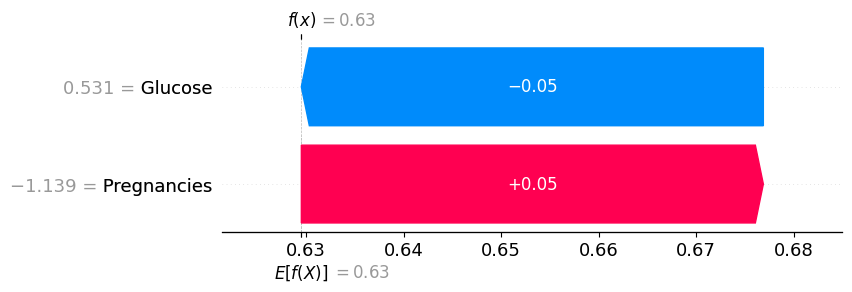

In [47]:
# Seleccione una observación
X_sample = X_test.iloc[[0]]  # Debe ser un DataFrame

# Descriptor SHAP (usando KernelExplainer)
# Tomar una muestra del conjunto de entrenamiento para los datos de fondo (por ejemplo, 50 muestras)
# Importante: Los datos de fondo deben provenir de los datos escalados en los que se entrenó el modelo.
background_data = shap.sample(X_train, 50) # 50 muestras aleatorias de X_train
# explainer = shap.Explainer(tabpfn_model.predict_proba, X_sample) # El método antiguo puede ser problemático
explainer = shap.KernelExplainer(tabpfn_model.predict_proba, background_data)

# Calcular valores SHAP (método shap_values ​​​​para KernelExplainer)
# shap_values = explainer(X_sample) # La vieja manera
shap_values_list = explainer.shap_values(X_sample) # KernelExplainer devuelve la lista [class0_shap, class1_shap]

# Obtener la clase prevista
predicted_class = int(tabpfn_model.predict(X_sample)[0]) # Haz una predicción con el modelo correcto

# Extraer manualmente la explicación de una sola clase (actualizada según la salida de KernelExplainer)
#Se utilizan los valores SHAP y el valor esperado de KernelExplainer.
single_shap = shap.Explanation(
    # shap_values_list[predicted_class] -> Valores SHAP de la clase predicha
    # [0] -> Valores para la primera (y única) muestra en X_sample
    values=shap_values_list[predicted_class][0],
    # explainer.expected_value[predicted_class] -> valor base (esperado) para la clase prevista
    base_values=explainer.expected_value[predicted_class],
    data=X_sample.values[0], # Datos de muestra
    feature_names=X_sample.columns # Nombres de funciones
)

# Gráfico de cascada (con anotación manual única)
# shap.plots.waterfall(shap_values[0, predicted_class], max_display=10) # Esta línea arrojó un TypeError, eliminándolo
shap.plots.waterfall(single_shap, max_display=10) # Gráfico con objeto single_shap actualizado

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
Este gráfico explica paso a paso cómo el modelo de aprendizaje automático genera su predicción para una sola observación. El conjunto de datos utilizado en el estudio es Pima Indians Diabetes y el propósito del modelo es predecir si el individuo tiene diabetes. La estimación promedio del modelo para todas las observaciones es E[f(x)] = 0.63 Mientras que su estimación para este individuo en particular f(x) = 0.964 nivel. Esto demuestra que el modelo considera que la probabilidad de que esta persona tenga diabetes es bastante alta..<br>
</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;  font-family: Arial, sans-serif;">
En este ejemplo, una de las características con mayor impacto en la predicción del modelo es el IMC. Aunque el valor del IMC del individuo estaba por debajo del promedio (puntuación Z de -1,132), es decir, bajo, el modelo lo interpretó como un aumento del riesgo de diabetes con una contribución SHAP de +0,14. <br><br>De manera similar, la edad, aunque inferior al promedio (-1,046), jugó un papel importante en el aumento de la probabilidad de diabetes del modelo al contribuir con +0,12. <br><br>DiabetesPedigreeFunction Aunque el valor también fue bajo (-0,991), la predisposición genética aumentó el riesgo con una contribución de +0,05, aunque fue limitada. <br><br>Los embarazos también contribuyeron +0,05 para aumentar la estimación, aunque a un valor igualmente bajo (-1,139).<br>Aunque el valor de SkinThickness fue bastante bajo (-1,877), contribuyó con una pequeña cantidad de +0,02 a la predicción de diabetes..<br><br>
Por otro lado, aunque el valor de Glucosa estuvo por encima de la media (+0,531), el modelo interpretó esta información como un factor que redujo ligeramente la estimación con un valor SHAP de −0,02. <br><br>De manera similar, el valor de insulina fue ligeramente superior al promedio (+0,104), pero el modelo lo consideró casi ineficaz en −0,01. <br><br>Finalmente, el valor de BloodPressure fue bajo (−0,411) y tuvo un efecto neutral (0,00) en la predicción del modelo..<br>
</p>